# Линейные модели в машинном обучении.

**Цель исследования:** 
Разработка модели машинного обучения, для управления рисками и принития объективного решения о расширении стада коров. Необходимо предсказать целевые признаки `Удой, кг` и `Вкус молока` у коров "ЭкоФермы" и помочь фермеру определиться с покупкой.

**Описание проекта:**  Фермер, владелец молочного хозяйства «Вольный луг», хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
«ЭкоФерма» готова предоставить подробные данные о своих коровах. 
Необходимо создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**Описание данных:**
Три датасета:

- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

**Ход исследования:**
* Шаг 1. Подготовка данных: загрузка и изучений общей информации о полученном датасете;
* Шаг 2. Предобработка данных: приведение к верному типу данных, добавление новых столбцов, обработка пропущенных значений, дубликатов и аномалий;
* Шаг 3. Исследовательский анализ данных;
* Шаг 4. Корреляционный анализ данных;
* Шаг 5. Обучение модели линейной регрессии;
* Шаг 6. Обучение модели логистической регрессии;

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

## Загрузка данных

### Импортируем библиотеки

In [1]:
!pip install -U scikit-learn

In [2]:
!pip install phik

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error, 
    accuracy_score, 
    recall_score, 
    precision_score, 
    confusion_matrix
)
import phik

### Считываем данные из файлов

In [2]:
data_main = pd.read_csv('ferma_main.csv', sep=';', decimal=',')

In [3]:
data_dad = pd.read_csv('ferma_dad.csv', sep=';', decimal=',')

In [4]:
data_cow_buy = pd.read_csv('cow_buy.csv', sep=';', decimal=',')

### Изучим данные: выведем статистику по каждому датасету и описание

In [5]:
def data_characteristics(df):
    return display(df.head(10), df.info())

In [6]:
data_characteristics(data_main)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


None

**Вывод:** В датасете 634 строки и 12 столбцов. Названия столбцов необходимо поменять. В столбцах `ЭКЕ (Энергетическая кормовая единица)`, `СПО (Сахаро-протеиновое соотношение)`, `Жирность,%`, `Белок,%` необходимо поменять типы данных. Пропусков нет.

In [7]:
data_characteristics(data_dad)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


None

**Вывод:** В датасете 629 строк и 2 столбца. Названия столбцов менять не нужно. Типы данных указаны верно. Пропусков нет.

In [8]:
data_characteristics(data_cow_buy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


None

**Вывод:** В датасете 20 строки и 7 столбцов. Названия столбцов необходимо поменять. Типы данных менять не нужно. Пропусков нет.

##  Предобработка данных

### Заменим названия столбцов в датасете

**Датасет data_main**

In [9]:
data_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [10]:
data_main.columns = ['id', 'milk_yield_kg', 'efu', 'raw_protein_g', 'sugar_protein_ratio', 'breed', 'pasture_type', 'breed_dad', 'fat_content', 'protein', 'milk_taste', 'age']    

In [11]:
data_main.columns

Index(['id', 'milk_yield_kg', 'efu', 'raw_protein_g', 'sugar_protein_ratio',
       'breed', 'pasture_type', 'breed_dad', 'fat_content', 'protein',
       'milk_taste', 'age'],
      dtype='object')

**Датасет data_dad**

In [12]:
data_dad.columns

Index(['id', 'Имя Папы'], dtype='object')

In [13]:
data_dad.columns = ['id', 'dad_name']

In [14]:
data_dad.columns

Index(['id', 'dad_name'], dtype='object')

**Датасет data_cow_buy**

In [15]:
data_cow_buy.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

In [16]:
data_cow_buy.columns = ['breed', 'pasture_type', 'breed_dad', 'dad_name', 'current_fat_content', 'current_protein_level', 'age']

In [17]:
data_cow_buy.columns

Index(['breed', 'pasture_type', 'breed_dad', 'dad_name', 'current_fat_content',
       'current_protein_level', 'age'],
      dtype='object')

Названия стоблцов переименованы

### Обработаем дубликаты

#### Посмотрим, есть ли явные дубликаты и удалим их при наличии

In [18]:
def explicit_duplicates(df):
    if df.duplicated().sum() > 0:
        df = df.drop_duplicates()

In [19]:
explicit_duplicates(data_main)

In [20]:
explicit_duplicates(data_dad)

Явные дубликаты удалены

#### Посмотрим, есть ли неявные дубликаты и удалим их при наличии

**Датасет data_main**

In [21]:
data_main.head(10)

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,breed,pasture_type,breed_dad,fat_content,protein,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


Посмотрим на неявные дубликаты в столбце `breed`

In [22]:
data_main['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Неявных дубликатов нет

Посмотрим на неявные дубликаты в столбце `pasture_type`

In [23]:
data_main['pasture_type'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

Заменим 'Равнинные' на 'Равнинное'

In [24]:
data_main['pasture_type'] = data_main['pasture_type'].str.replace('Равнинные', 'Равнинное')

Посмотрим на неявные дубликаты в столбце `breed_dad`

In [25]:
data_main['breed_dad'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

Заменим 'Айдиалл' на 'Айдиал'

In [26]:
data_main['breed_dad'] = data_main['breed_dad'].str.replace('Айдиалл', 'Айдиал')

Посмотрим на неявные дубликаты в столбце `milk_taste`

In [27]:
data_main['milk_taste'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

Неявных дубликатов нет

Посмотрим на неявные дубликаты в столбце `age`

In [28]:
data_main['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Неявных дубликатов нет

**Датасет data_dad**

In [29]:
data_dad.head(10)

,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [30]:
data_dad['dad_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Неявных дубликатов нет

**Датасет data_cow_buy**

In [31]:
data_cow_buy.head(10)

,breed,pasture_type,breed_dad,dad_name,current_fat_content,current_protein_level,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Посмотрим на неявные дубликаты в столбце `breed`

In [32]:
data_cow_buy['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Неявных дубликатов нет

Посмотрим на неявные дубликаты в столбце `pasture_type`

In [33]:
data_cow_buy['pasture_type'].unique()

array(['холмистое', 'равнинное'], dtype=object)

Неявных дубликатов нет

Посмотрим на неявные дубликаты в столбце `breed_dad`

In [34]:
data_cow_buy['breed_dad'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Неявных дубликатов нет

Посмотрим на неявные дубликаты в столбце `dad_name`

In [35]:
data_cow_buy['dad_name'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

Неявных дубликатов нет

Посмотрим на неявные дубликаты в столбце `age`

In [36]:
data_cow_buy['age'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Неявных дубликатов нет

Неявные дубликаты удалены

### Обработаем аномальные значения

Посмотрим сводную статистику для числовых данных

In [37]:
def decribe_data(df):
    return df.describe()

**Датасет data_main**

In [38]:
decribe_data(data_main)

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,fat_content,protein
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


В столбце удой мы видим аномальное значение 45616 кг, удалим его.

In [39]:
data_main = data_main[data_main['milk_yield_kg']<45616]

In [40]:
decribe_data(data_main)

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,fat_content,protein
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,317.935229,6124.736177,14.547551,1923.074250,0.912828,3.604550,3.075665
std,182.850982,474.172345,1.296684,182.270289,0.032227,0.167456,0.002542
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,160.000000,5751.000000,13.500000,1773.000000,0.890000,3.590000,3.074000
50%,318.000000,6130.000000,14.700000,1881.000000,0.930000,3.650000,3.076000
75%,476.000000,6501.000000,15.600000,2059.000000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


**Датасет data_dad**

In [41]:
decribe_data(data_dad)

,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


**Датасет data_cow_buy**

In [42]:
decribe_data(data_cow_buy)

,current_fat_content,current_protein_level
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Аномальных значений нет

### Вывод

Я выполнила преобработку данных:
* заменила названия столбцов;
* привела типы данных к нужным типам;
* обработала дубликаты;

Аномальных значений и пропусков в данных не обнаружено.

Данные сократились на несколько строк, но стали значительно чище, а значит выводы будут более точными. Можем приступать к исследовательскому анализу данных.

## Исследовательский анализ данных

### Проведем статистический анализ для всех признаков

**Датасет data_main**

In [43]:
data_main.describe()

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,fat_content,protein
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,317.935229,6124.736177,14.547551,1923.074250,0.912828,3.604550,3.075665
std,182.850982,474.172345,1.296684,182.270289,0.032227,0.167456,0.002542
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,160.000000,5751.000000,13.500000,1773.000000,0.890000,3.590000,3.074000
50%,318.000000,6130.000000,14.700000,1881.000000,0.930000,3.650000,3.076000
75%,476.000000,6501.000000,15.600000,2059.000000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [44]:
data_main.describe(include='object')

,breed,pasture_type,breed_dad,milk_taste,age
count,633,633,633,633,633
unique,2,2,2,2,2
top,Вис Бик Айдиал,Холмистое,Айдиал,вкусно,более_2_лет
freq,372,355,317,370,523


**Датасет data_dad**

In [45]:
data_dad.describe()

,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


In [46]:
data_dad.describe(include='object')

,dad_name
count,629
unique,4
top,Барин
freq,240


**Датасет data_cow_buy**

In [47]:
data_cow_buy.describe()

,current_fat_content,current_protein_level
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [48]:
data_cow_buy.describe(include='object')

,breed,pasture_type,breed_dad,dad_name,age
count,20,20,20,20,20
unique,2,2,2,4,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,более_2_лет
freq,11,11,12,8,15


### Построим графики для каждого признака

**Датасет data_main**

In [49]:
data_main.head(5)

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,breed,pasture_type,breed_dad,fat_content,protein,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


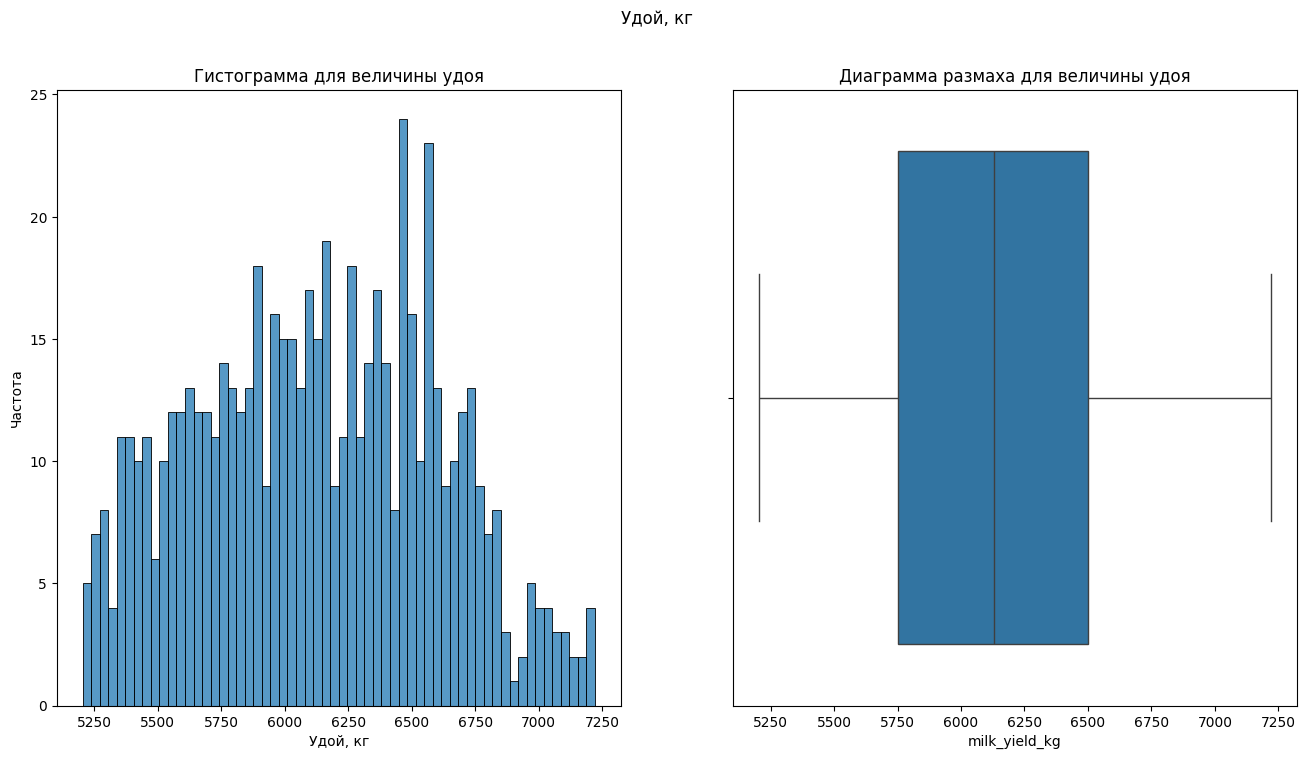

In [50]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main, x = 'milk_yield_kg', ax=axs[0], bins = 60)
axs[0].set_xlabel('Удой, кг')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма для величины удоя')
sns.boxplot(data = data_main, x = 'milk_yield_kg', ax=axs[1])
axs[1].set_title('Диаграмма размаха для величины удоя')
fig.suptitle('Удой, кг')
plt.show()

Аномальных значений нет.

In [51]:
data_main = data_main[data_main['milk_yield_kg']<20000]

In [52]:
data_main.describe()

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,fat_content,protein
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,317.935229,6124.736177,14.547551,1923.074250,0.912828,3.604550,3.075665
std,182.850982,474.172345,1.296684,182.270289,0.032227,0.167456,0.002542
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,160.000000,5751.000000,13.500000,1773.000000,0.890000,3.590000,3.074000
50%,318.000000,6130.000000,14.700000,1881.000000,0.930000,3.650000,3.076000
75%,476.000000,6501.000000,15.600000,2059.000000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


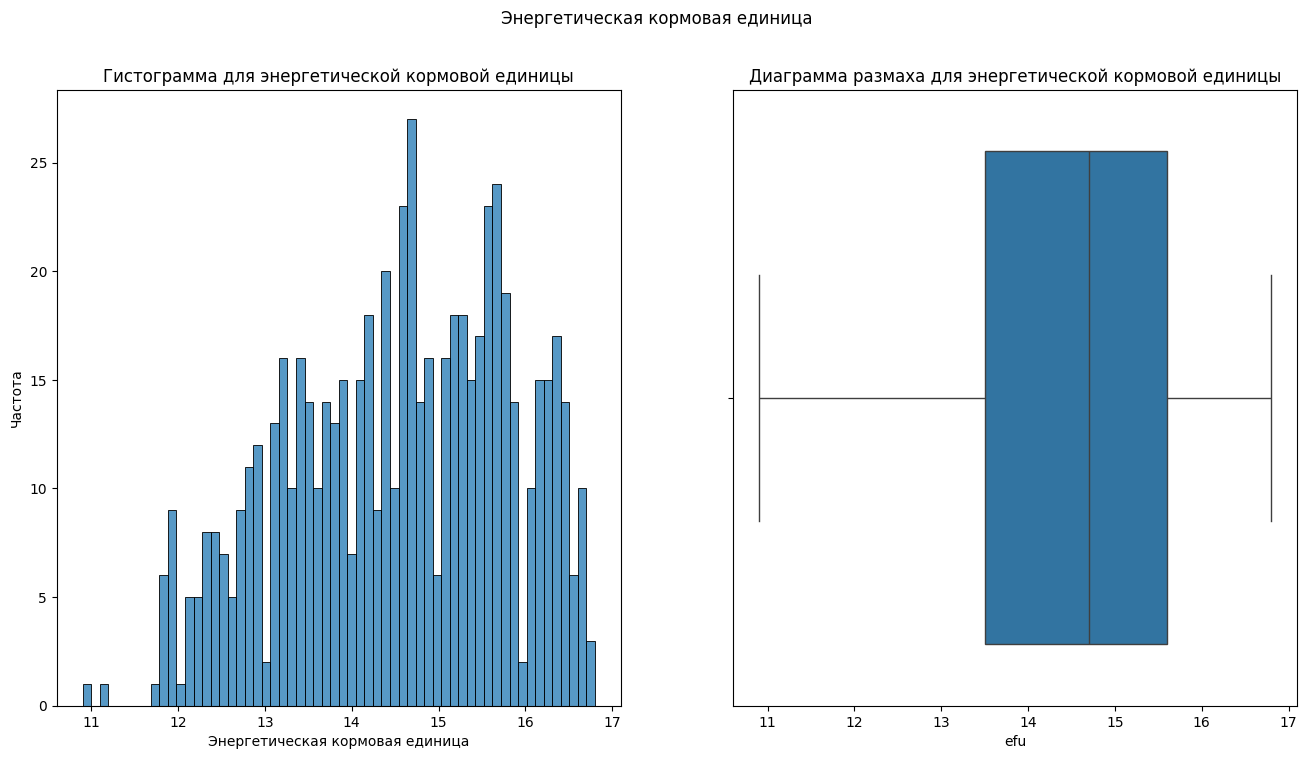

In [53]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main, x = 'efu', ax=axs[0], bins = 60)
axs[0].set_xlabel('Энергетическая кормовая единица')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма для энергетической кормовой единицы')
sns.boxplot(data = data_main, x = 'efu', ax=axs[1])
axs[1].set_title('Диаграмма размаха для энергетической кормовой единицы')
fig.suptitle('Энергетическая кормовая единица')
plt.show()

Аномалий нет

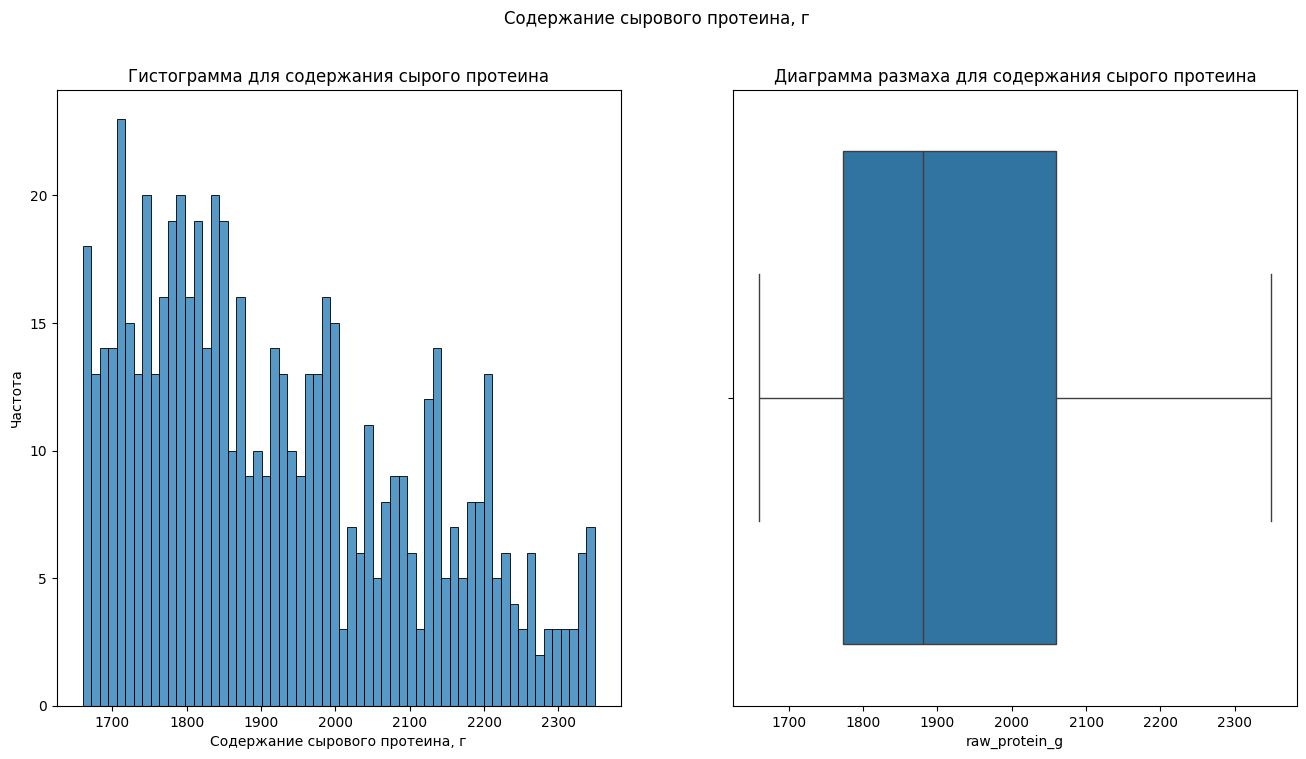

In [54]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main, x = 'raw_protein_g', ax=axs[0], bins = 60)
axs[0].set_xlabel('Содержание сырового протеина, г')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма для содержания сырого протеина')
sns.boxplot(data = data_main, x = 'raw_protein_g', ax=axs[1])
axs[1].set_title('Диаграмма размаха для содержания сырого протеина')
fig.suptitle('Содержание сырового протеина, г')
plt.show()

Аномалий нет

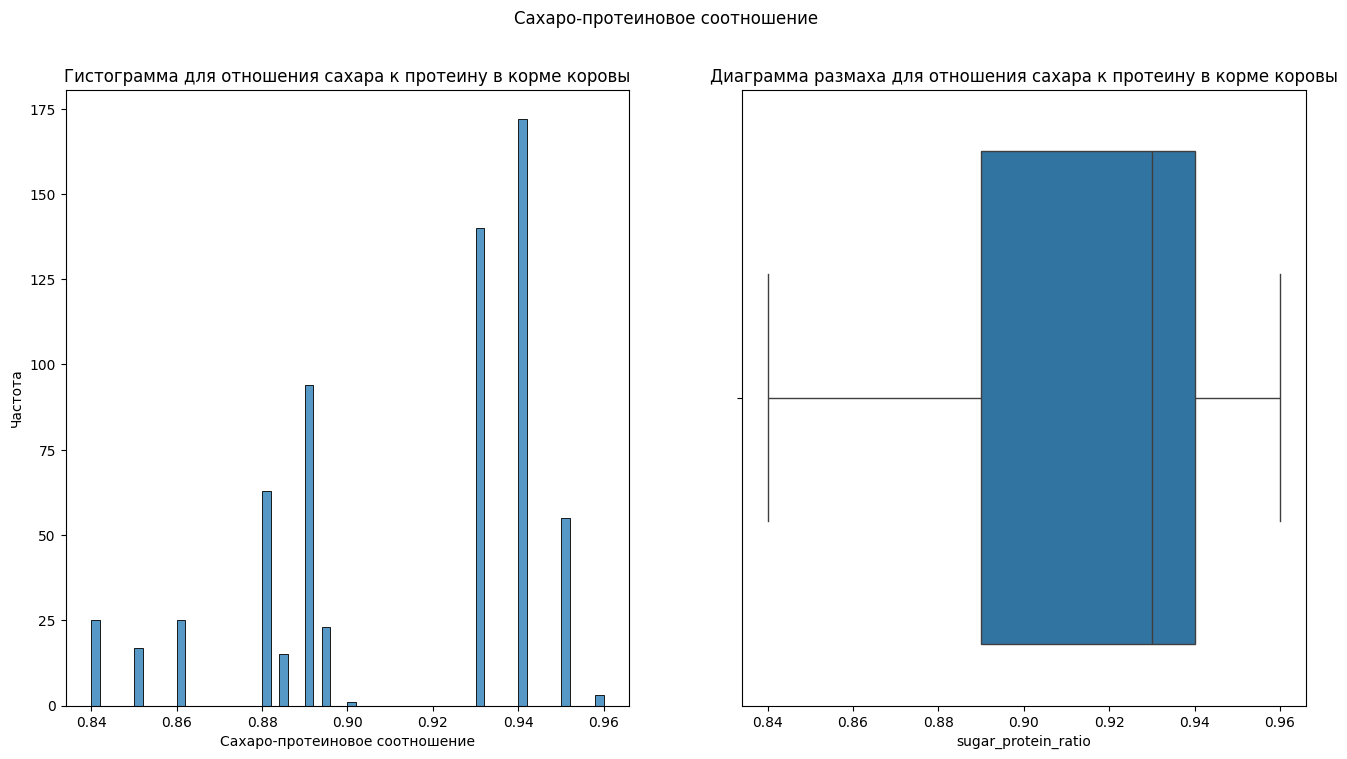

In [55]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main, x = 'sugar_protein_ratio', ax=axs[0], bins = 60)
axs[0].set_xlabel('Сахаро-протеиновое соотношение')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма для отношения сахара к протеину в корме коровы')
sns.boxplot(data = data_main, x = 'sugar_protein_ratio', ax=axs[1])
axs[1].set_title('Диаграмма размаха для отношения сахара к протеину в корме коровы')
fig.suptitle('Сахаро-протеиновое соотношение')
plt.show()

Аномалий нет

In [56]:
data_main.describe()

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,fat_content,protein
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,317.935229,6124.736177,14.547551,1923.074250,0.912828,3.604550,3.075665
std,182.850982,474.172345,1.296684,182.270289,0.032227,0.167456,0.002542
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,160.000000,5751.000000,13.500000,1773.000000,0.890000,3.590000,3.074000
50%,318.000000,6130.000000,14.700000,1881.000000,0.930000,3.650000,3.076000
75%,476.000000,6501.000000,15.600000,2059.000000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


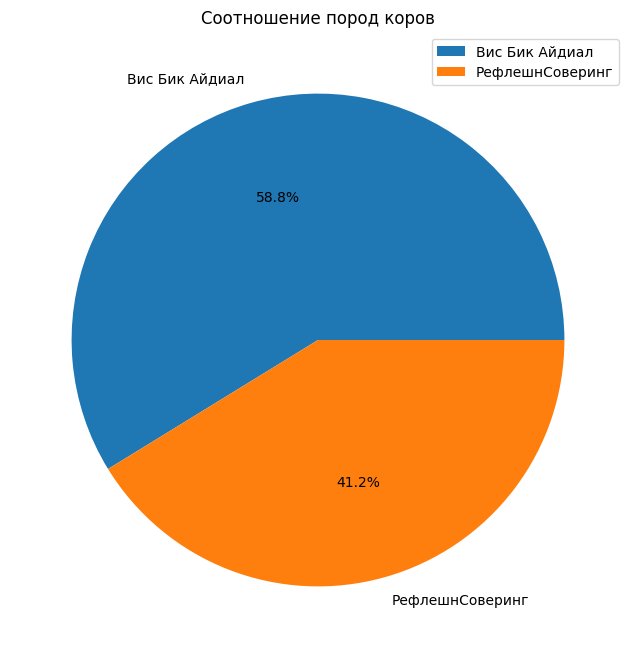

In [57]:
data_main.pivot_table(index='breed', values = 'id', aggfunc = 'count').plot(kind='pie', y='id', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение пород коров')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

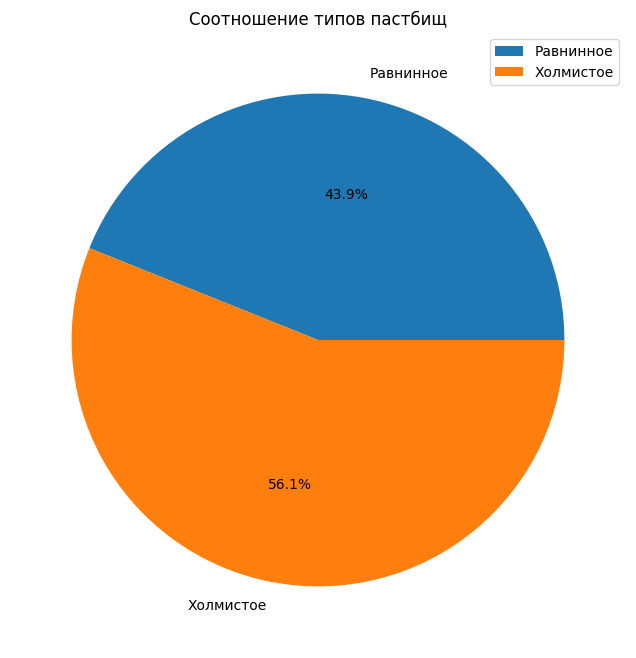

In [58]:
data_main.pivot_table(index='pasture_type', values = 'id', aggfunc = 'count').plot(kind='pie', y='id', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение типов пастбищ')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

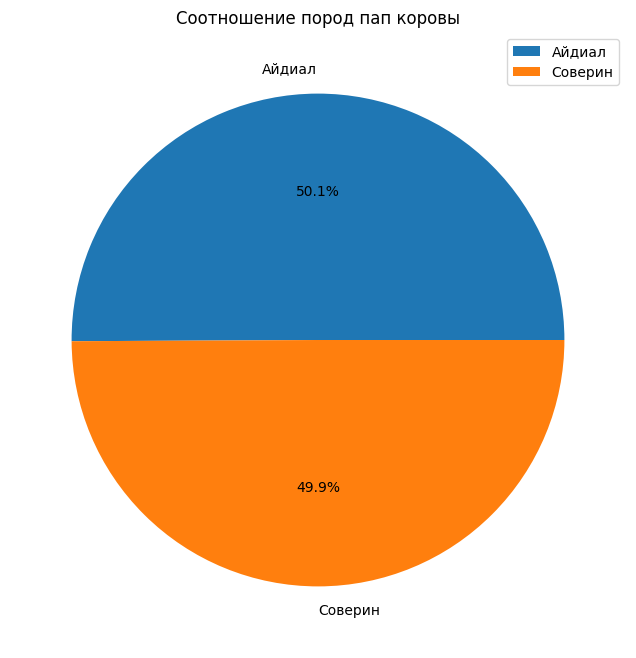

In [59]:
data_main.pivot_table(index='breed_dad', values = 'id', aggfunc = 'count').plot(kind='pie', y='id', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение пород пап коровы')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

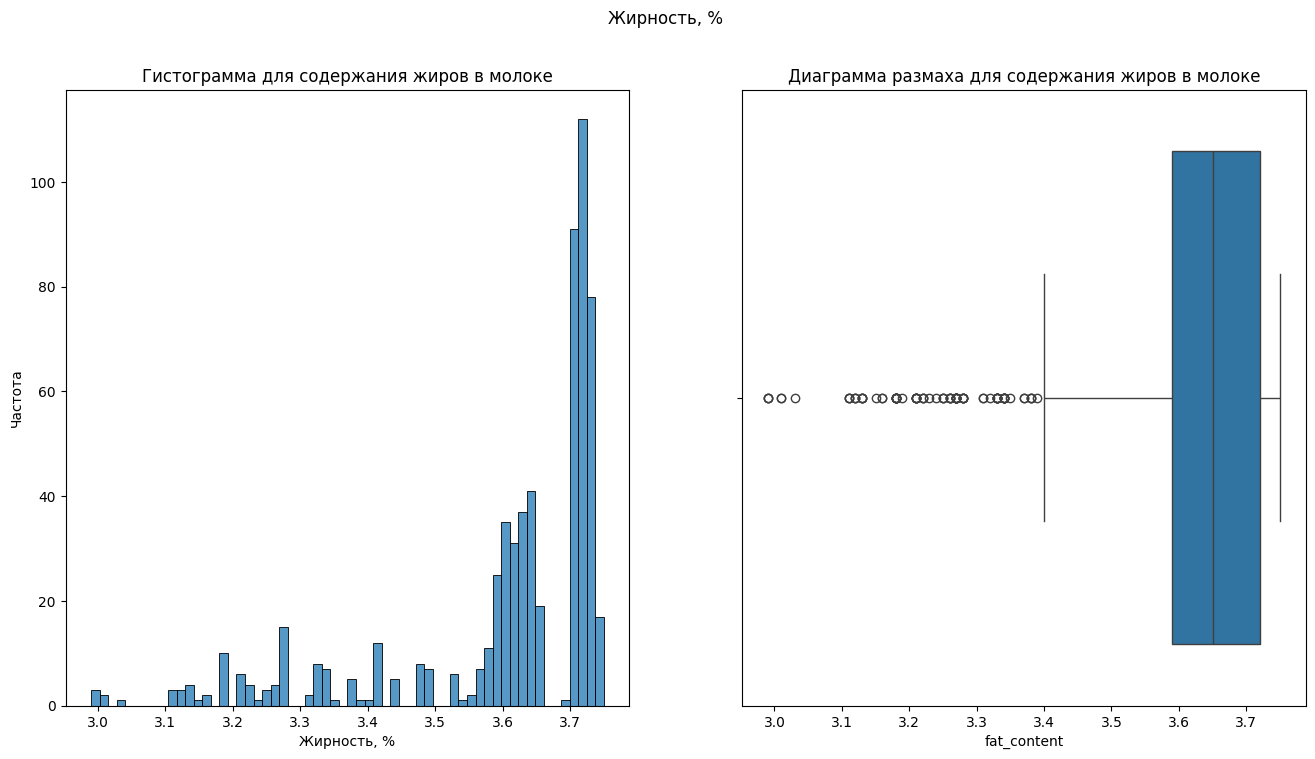

In [60]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main, x = 'fat_content', ax=axs[0], bins = 60)
axs[0].set_xlabel('Жирность, %')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма для содержания жиров в молоке')
sns.boxplot(data = data_main, x = 'fat_content', ax=axs[1])
axs[1].set_title('Диаграмма размаха для содержания жиров в молоке')
fig.suptitle('Жирность, %')
plt.show()

Есть несколько выбивающихся занчений меньше 3,4, но их нельзя считать аномалиями, так как 3,0 в целом нормальное содержание жиров в молоке.

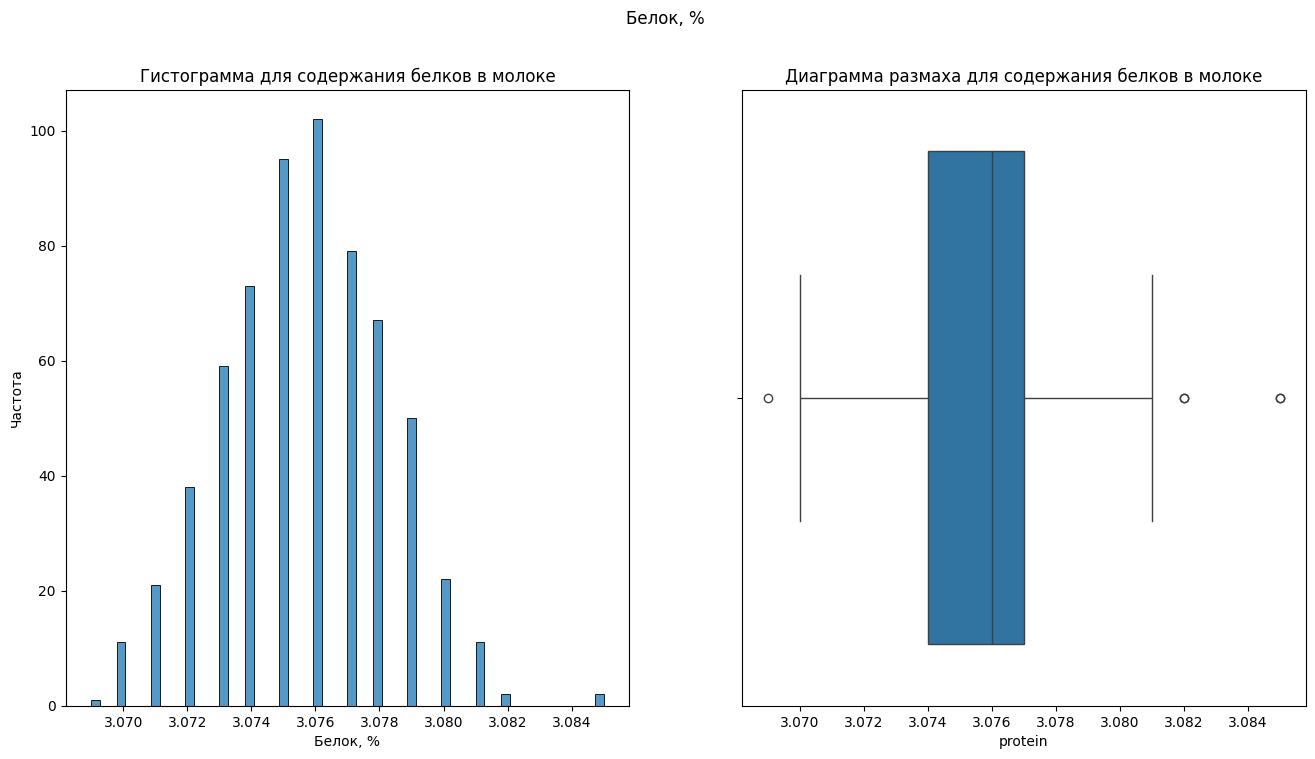

In [61]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_main, x = 'protein', ax=axs[0], bins = 60)
axs[0].set_xlabel('Белок, %')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма для содержания белков в молоке')
sns.boxplot(data = data_main, x = 'protein', ax=axs[1])
axs[1].set_title('Диаграмма размаха для содержания белков в молоке')
fig.suptitle('Белок, %')
plt.show()

Есть несколько выбивающихся занчений меньше 3,4, но аналагично содержанию жиров в молоке их нельзя считать аномалиями.

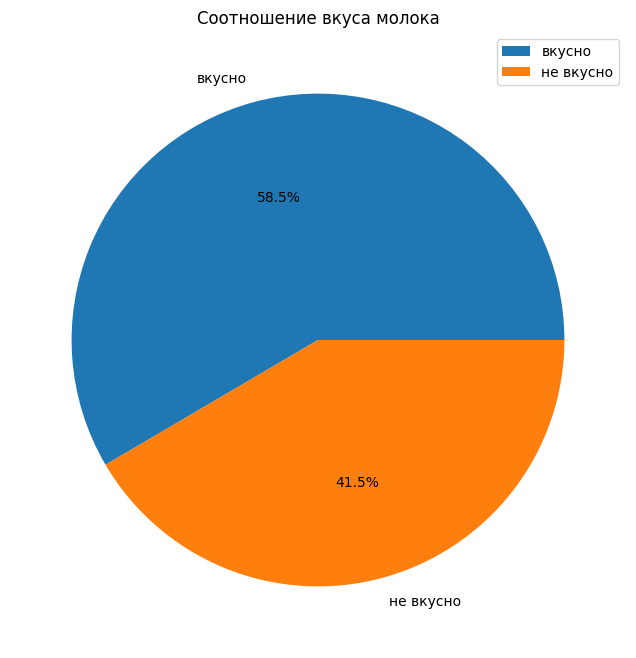

In [62]:
data_main.pivot_table(index='milk_taste', values = 'id', aggfunc = 'count').plot(kind='pie', y='id', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение вкуса молока')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

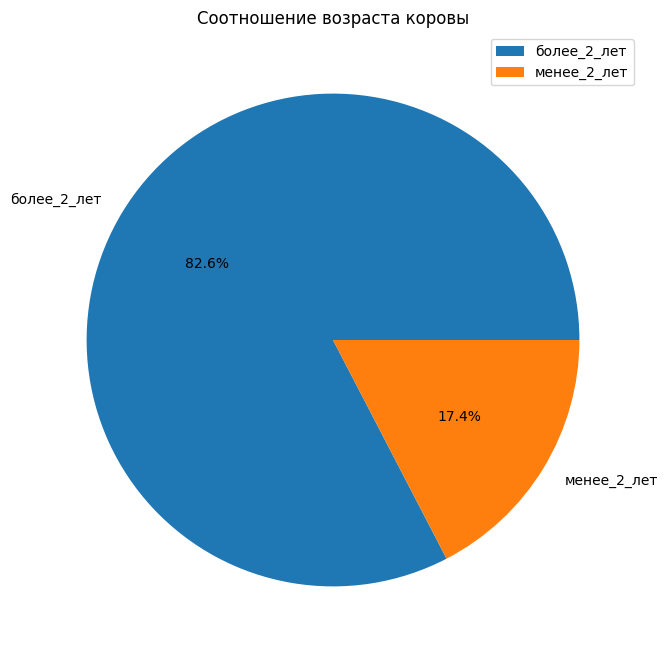

In [63]:
data_main.pivot_table(index='age', values = 'id', aggfunc = 'count').plot(kind='pie', y='id', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение возраста коровы')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Датасет data_dad**

In [64]:
data_dad.head(5)

,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


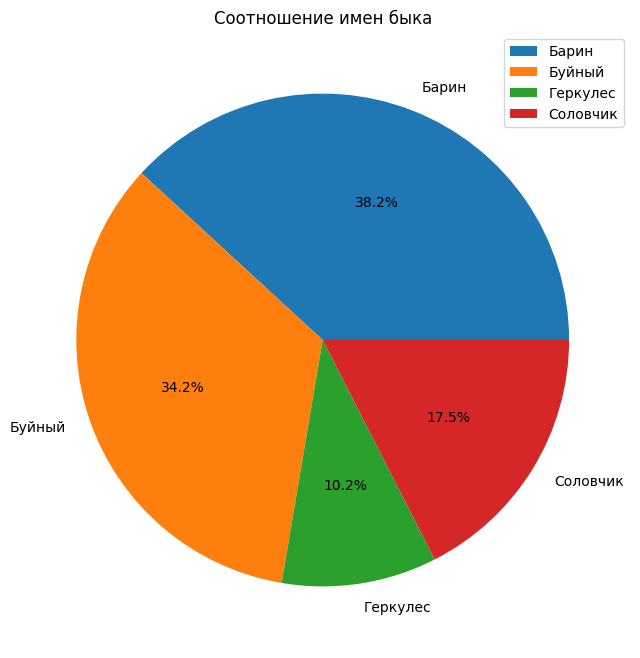

In [65]:
data_dad.pivot_table(index='dad_name', values = 'id', aggfunc = 'count').plot(kind='pie', y='id', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение имен быка')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Датасет data_cow_buy**

In [66]:
data_cow_buy.head(5)

,breed,pasture_type,breed_dad,dad_name,current_fat_content,current_protein_level,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


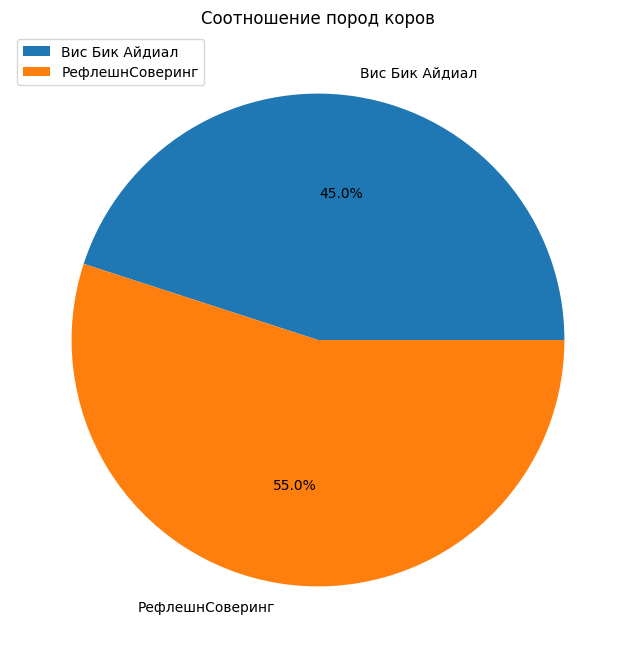

In [67]:
data_cow_buy.pivot_table(index='breed', values = 'current_fat_content', aggfunc = 'count').plot(kind='pie', y='current_fat_content', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение пород коров')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

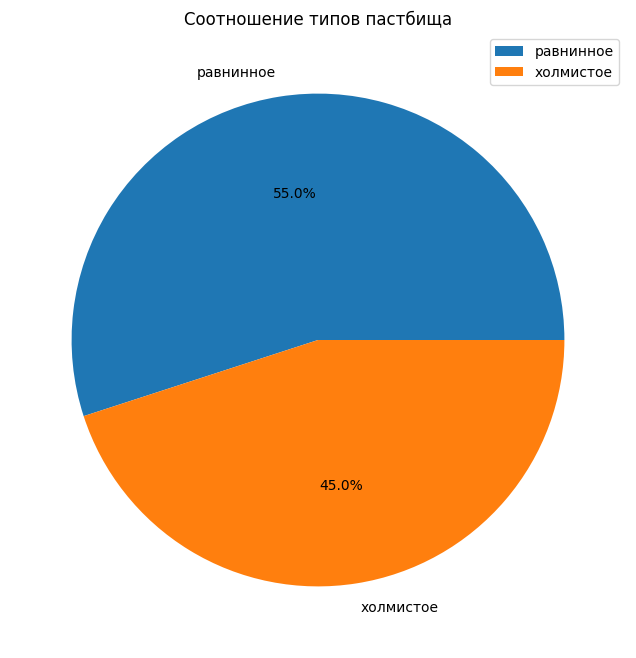

In [68]:
data_cow_buy.pivot_table(index='pasture_type', values = 'current_fat_content', aggfunc = 'count').plot(kind='pie', y='current_fat_content', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение типов пастбища')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

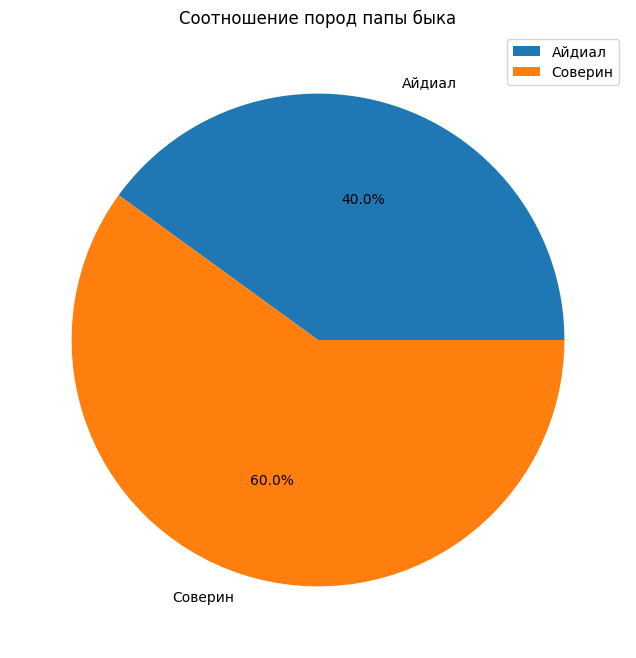

In [69]:
data_cow_buy.pivot_table(index='breed_dad', values = 'current_fat_content', aggfunc = 'count').plot(kind='pie', y='current_fat_content', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение пород папы быка')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

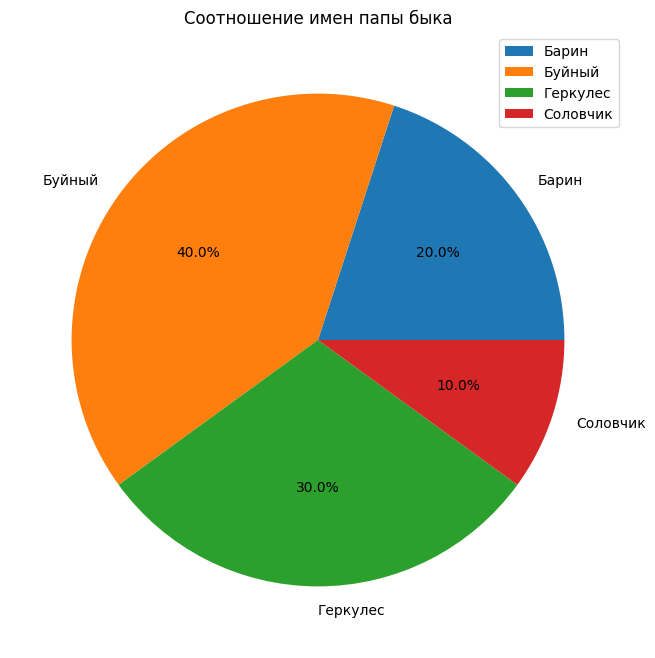

In [70]:
data_cow_buy.pivot_table(index='dad_name', values = 'current_fat_content', aggfunc = 'count').plot(kind='pie', y='current_fat_content', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение имен папы быка')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

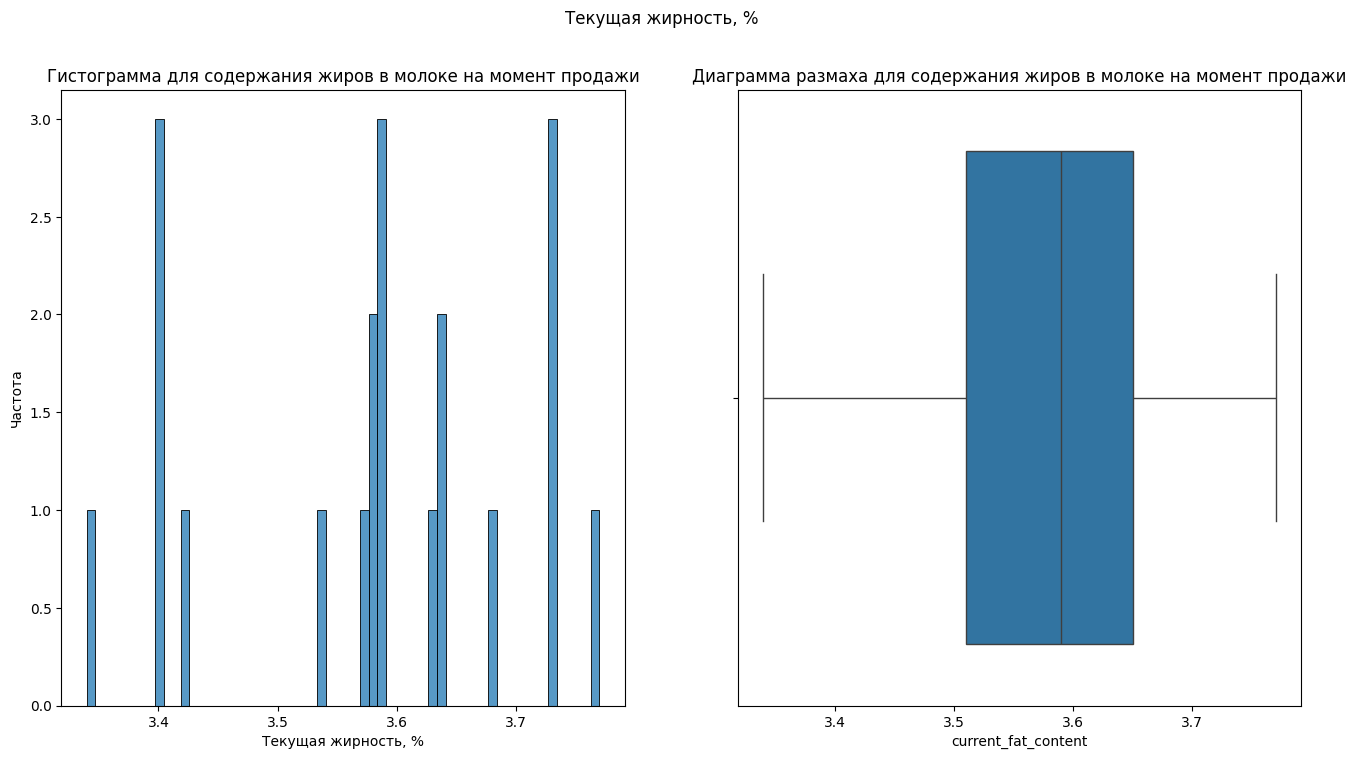

In [71]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_cow_buy, x = 'current_fat_content', ax=axs[0], bins = 60)
axs[0].set_xlabel('Текущая жирность, %')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма для содержания жиров в молоке на момент продажи')
sns.boxplot(data = data_cow_buy, x = 'current_fat_content', ax=axs[1])
axs[1].set_title('Диаграмма размаха для содержания жиров в молоке на момент продажи')
fig.suptitle('Текущая жирность, %')
plt.show()

Аномалий нет

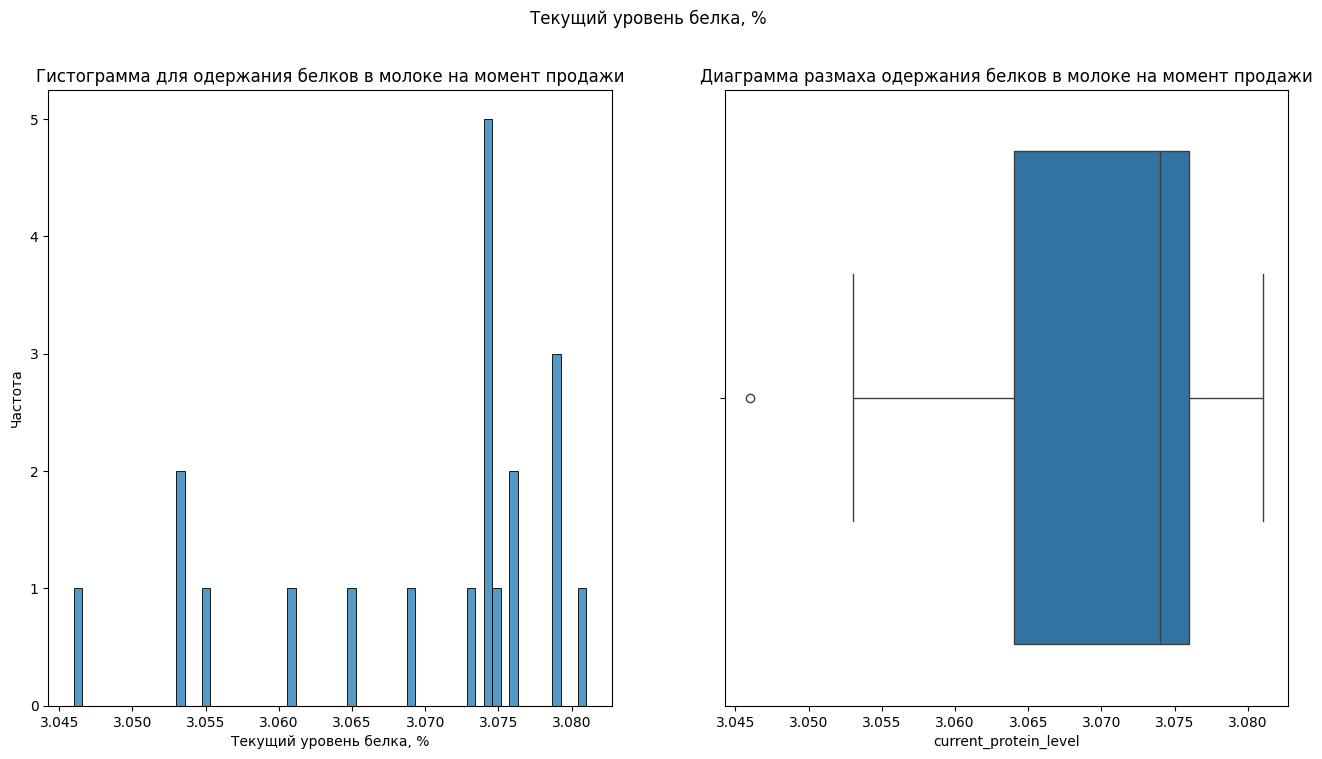

In [72]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = data_cow_buy, x = 'current_protein_level', ax=axs[0], bins = 60)
axs[0].set_xlabel('Текущий уровень белка, %')
axs[0].set_ylabel('Частота')
axs[0].set_title('Гистограмма для одержания белков в молоке на момент продажи')
sns.boxplot(data = data_cow_buy, x = 'current_protein_level', ax=axs[1])
axs[1].set_title('Диаграмма размаха одержания белков в молоке на момент продажи')
fig.suptitle('Текущий уровень белка, %')
plt.show()

Есть одно выбивающееся значение, но его нельзя считать аномалией.

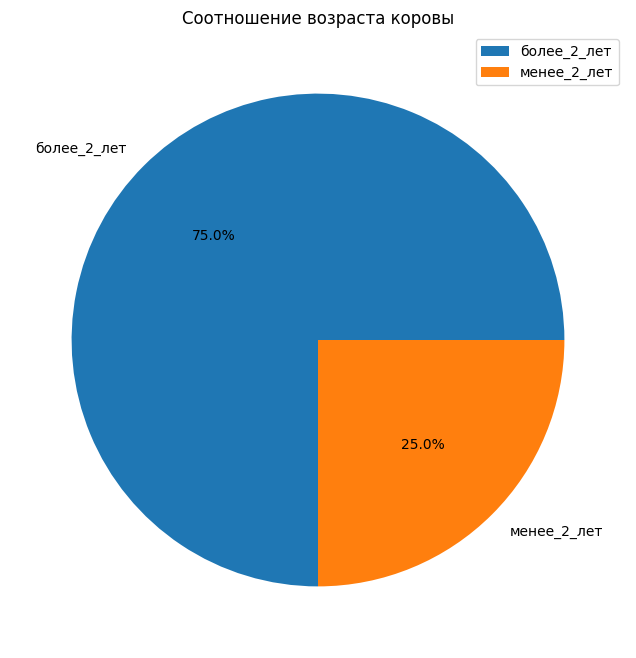

In [73]:
data_cow_buy.pivot_table(index='age', values = 'current_fat_content', aggfunc = 'count').plot(kind='pie', y='current_fat_content', autopct='%1.1f%%', figsize=(12,8))
plt.title('Соотношение возраста коровы')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Вывод

На основе проведенного исследовательского анализа можно сделать следующие выводы:
1. **Датасет data_main**
* В данных по удою было одно аномальное значение, я его удалила, среднее значение удоя - 6187 кг, минимальное 5204 кг, максимальное - 7222 кг;
* В данных по энергетической кормовой единице аномалий не было, среднее значение - 14.5, минимальное - 10.9, максимальное - 16,8;
* В данных по содержанию сырого протеина аномалий не было, среднее значение - 1923 г, минимальное - 1660 г, максимальное - 2349 г;
* В данных по содержанию сахаро-протеинового содержания аномалий не было, среднее значение - 0.91, минимальное - 0.84, максимальное - 0.96;
* В данных по содержанию жиров в молоке были выбивающиеся значения, но их нельзя считать аномалиями, среднее значение - 3.6, минимальное 2.9, максимальное 0.96;
* В данных по содержанию белков в молоке были выбивающиеся значения, но их нельзя считать аномалиями, среднее значение - 3.07, минимальное 3.06, максимальное 3.08;
* По породам коровы распределились в следующих пропорциях: Вис Бик Айдиал - 58,8%, РефлешнСоверинг - 41,2%;
* Соотношение типов пастбищ: равнинное - 43.9%, холмистое - 56,1%;
* Соотношение пород пап коров: Айдиал - 50,1%, Соверин - 49,9%;
* Соотношение вкуса молока: вкусно - 58,5%, не вкусно - 41,5%;
* Соотношение возраста коровы: более двух лет - 82,6%, менее двух лет - 17,4%.
2. **Датасет data_dad**
* Соотношение по именам быка: Барин - 38,2%, Буйный - 34,2%, Соловчик - 17,5%, Геркулес - 10,2%.
3. **Датасет data_cow_buy**
* Соотношение пород коров: Вис Бик Айдиал - 45%, РефлешнСоверинг - 55%;
* Соотношение типов пастбищ: равнинное - 55%, холмистое - 45%;
* Соотношение пород пап коров: Айдиал - 40%, Соверин - 60%;
* Соотношение по именам быка: Барин - 20%, Буйный - 40%, Соловчик - 10%, Геркулес - 30%;
* Соотношение возраста коровы: более двух лет - 75%, менее двух лет - 25%;
* В данных по содержанию жиров в молоке на момент продажи аномалий нет, среднее значение - 3.57, минимальное - 3.34, максимальное - 3.77;
* В данных по содержанию белков в молоке есть одно выбивающееся значение, но его нельзя считать аномалией, среднее значение - 3.06, минимальное - 3.04, максимальное - 3.08.

Перейдем к корреляционному анализу данных

## Корреляционный анализ

Посмотрим на зависимость целевого признака Удой от остальных параметров

### Рассчитаем коэффициенты корреляции между всеми признаками и построим тепловую карту

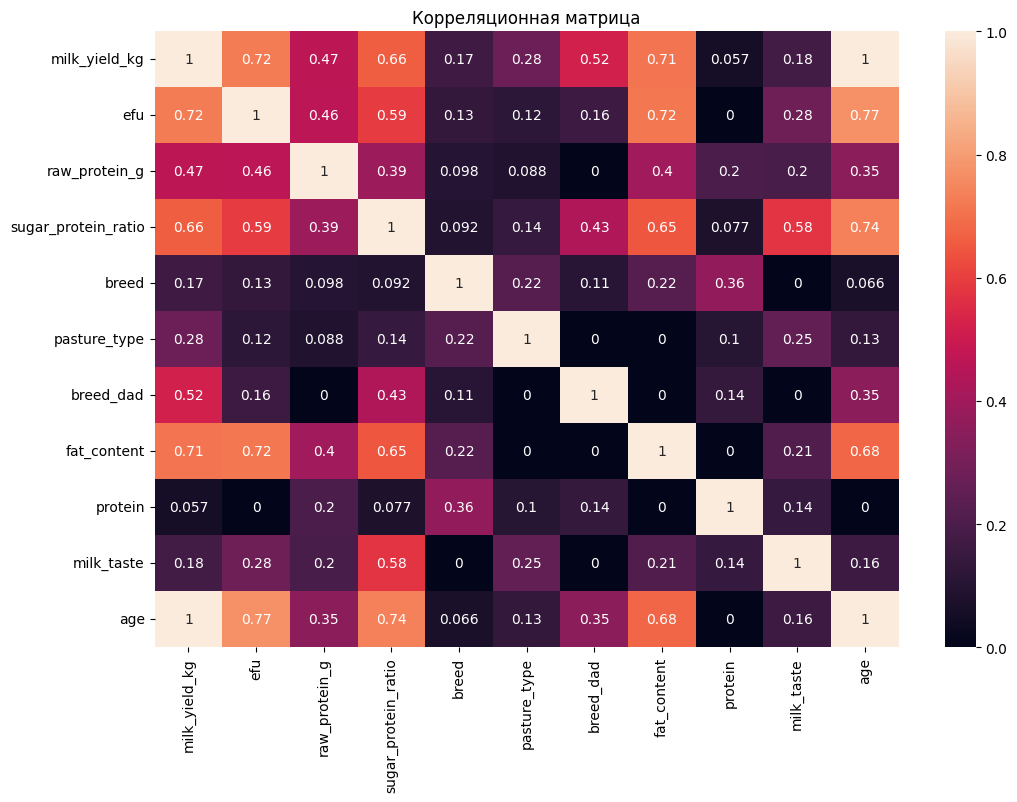

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_main.drop('id', axis=1).phik_matrix(interval_cols=['milk_yield_kg','efu','raw_protein_g','sugar_protein_ratio','fat_content', 'protein']), annot=True)
plt.title('Корреляционная матрица')
plt.show()

### Построим диаграммы рассеяния для признака Удой  и всех количественных признаковс учетом значения категориальных признаков, а также посмотрим на зависимость целевого признака от неколичественных признаков.

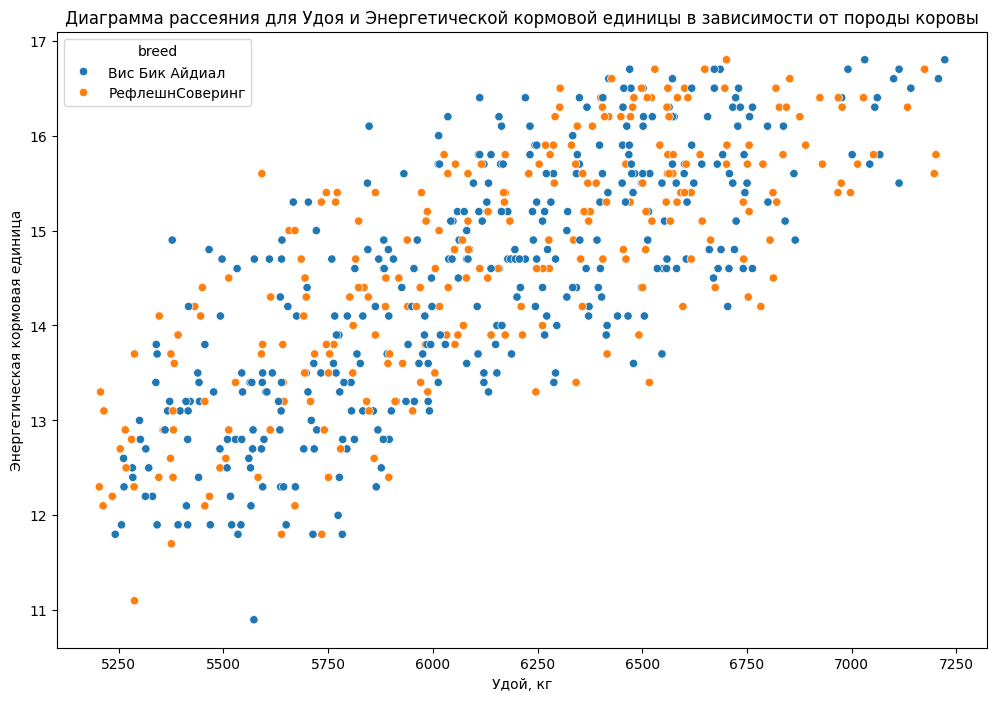

In [75]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="efu", hue="breed")
plt.title('Диаграмма рассеяния для Удоя и Энергетической кормовой единицы в зависимости от породы коровы')
plt.xlabel('Удой, кг')
plt.ylabel('Энергетическая кормовая единица')
plt.show()

На графике мы наблюдаем линейную связь между Удоем и Энергетической кормовой единицей для обеих пород коров

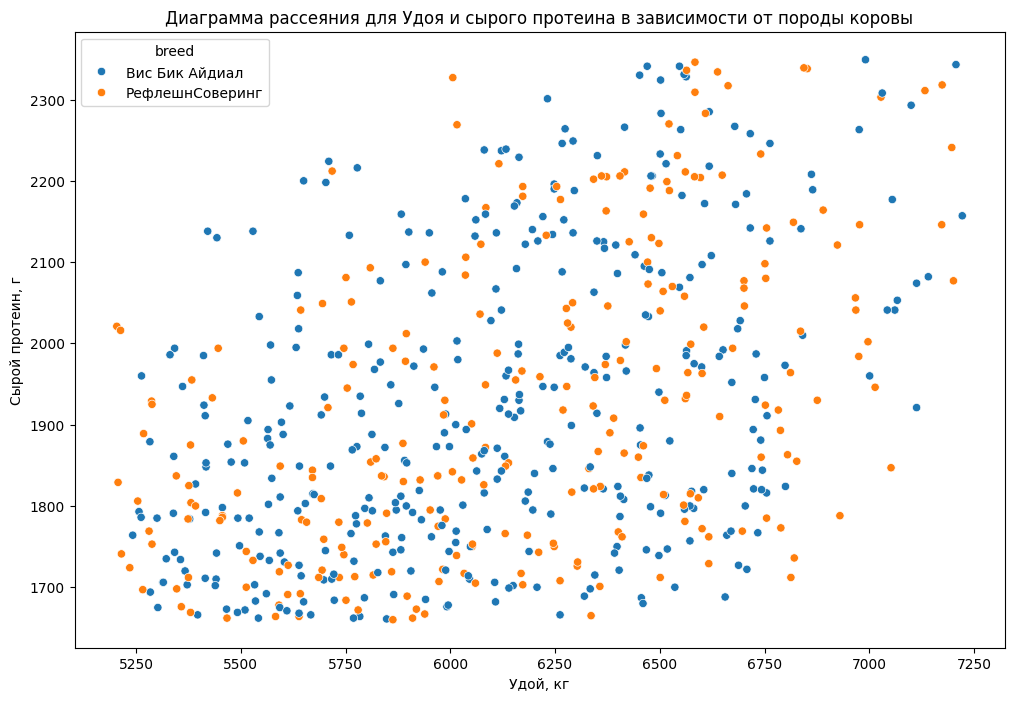

In [76]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="raw_protein_g", hue="breed")
plt.title('Диаграмма рассеяния для Удоя и сырого протеина в зависимости от породы коровы')
plt.xlabel('Удой, кг')
plt.ylabel('Сырой протеин, г')
plt.show()

Линейной зависимости между Удоем и содержанием сырого протеина в молоке, как и ожидалось, нет.

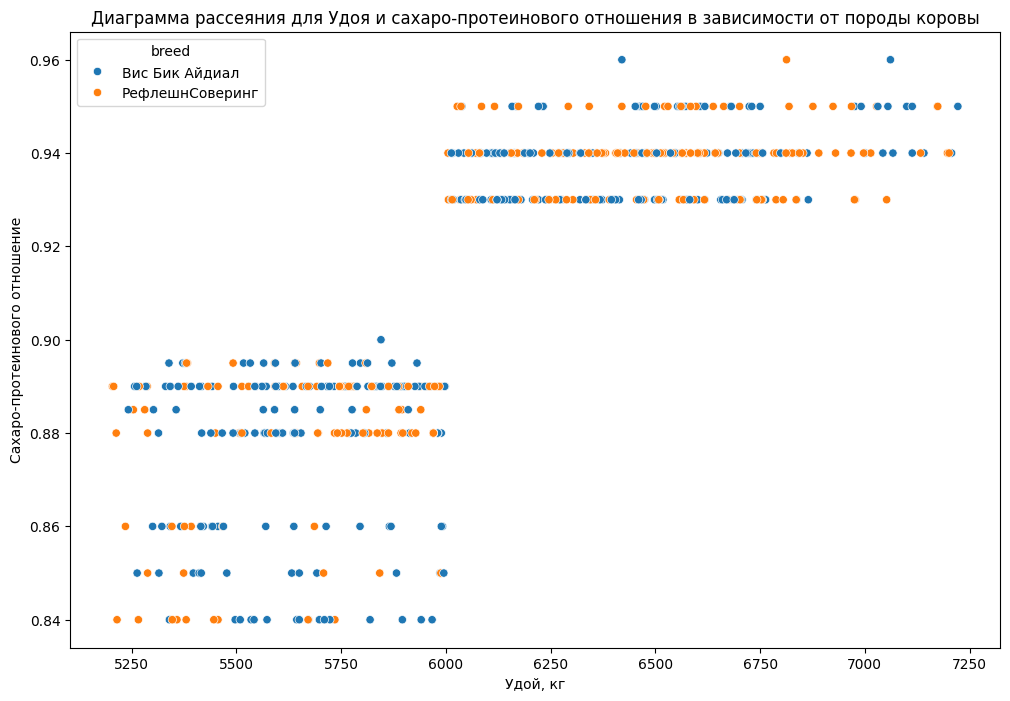

In [77]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="sugar_protein_ratio", hue="breed")
plt.title('Диаграмма рассеяния для Удоя и сахаро-протеинового отношения в зависимости от породы коровы')
plt.xlabel('Удой, кг')
plt.ylabel('Сахаро-протеинового отношение')
plt.show()

Удой и Сахаро-протеиновое соотношение связаны нелинейно, данные сгруппированы в два кластера граница находится на 6000 кг. Показатели одинаковы для обеих пород.

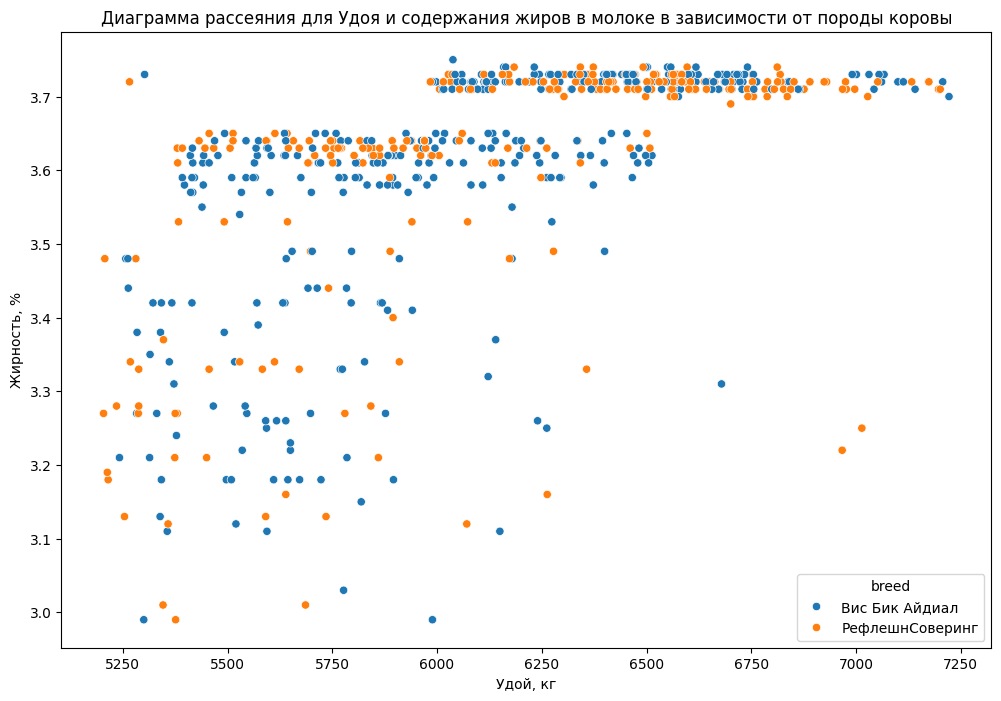

In [78]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="fat_content", hue="breed")
plt.title('Диаграмма рассеяния для Удоя и содержания жиров в молоке в зависимости от породы коровы')
plt.xlabel('Удой, кг')
plt.ylabel('Жирность, %')
plt.show()

Линейной зависимости между Удоем и содержанием жиров в молоке нет.

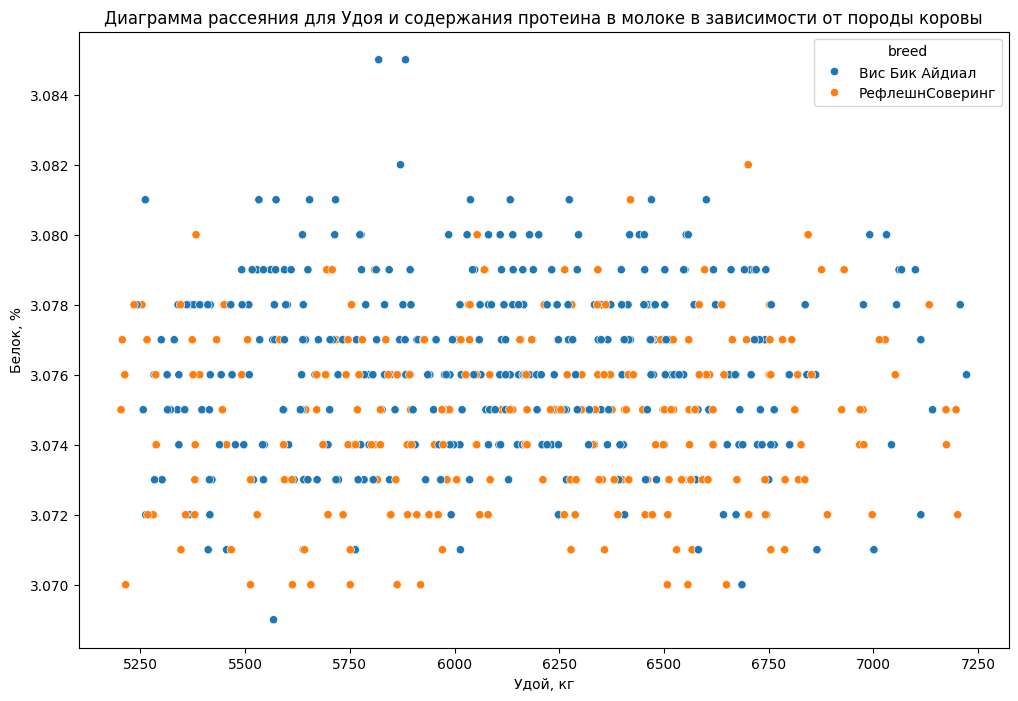

In [79]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="protein", hue="breed")
plt.title('Диаграмма рассеяния для Удоя и содержания протеина в молоке в зависимости от породы коровы')
plt.xlabel('Удой, кг')
plt.ylabel('Белок, %')
plt.show()

Линейной зависимости между Удоем и содержанием протеина в молоке нет.

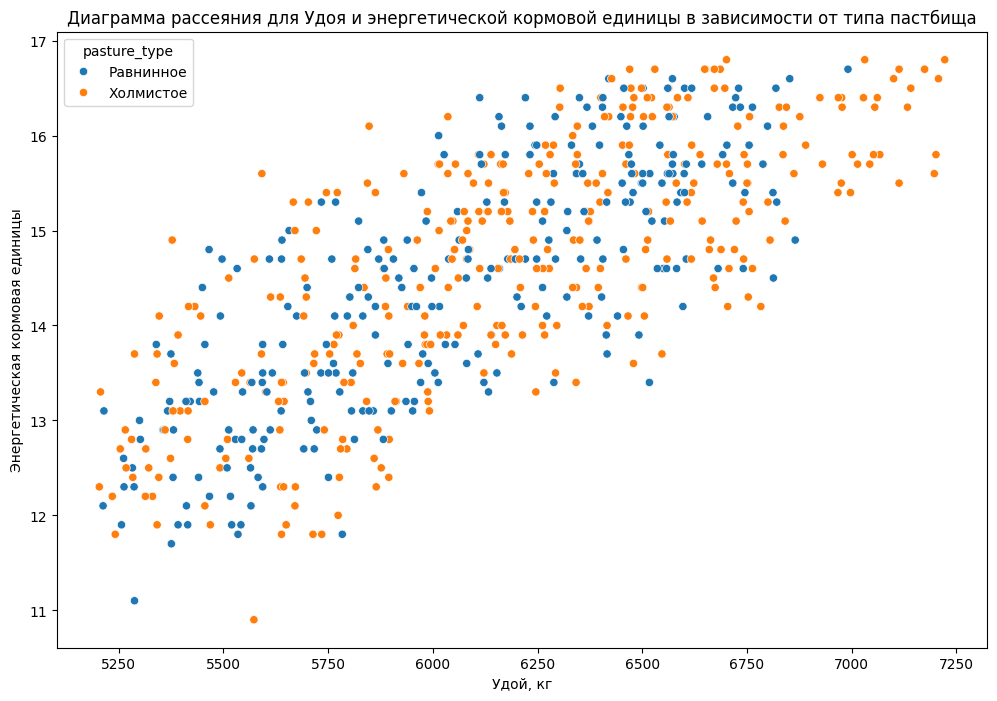

In [80]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="efu", hue="pasture_type")
plt.title('Диаграмма рассеяния для Удоя и энергетической кормовой единицы в зависимости от типа пастбища')
plt.xlabel('Удой, кг')
plt.ylabel('Энергетическая кормовая единицы')
plt.show()

Линейная зависимость есть

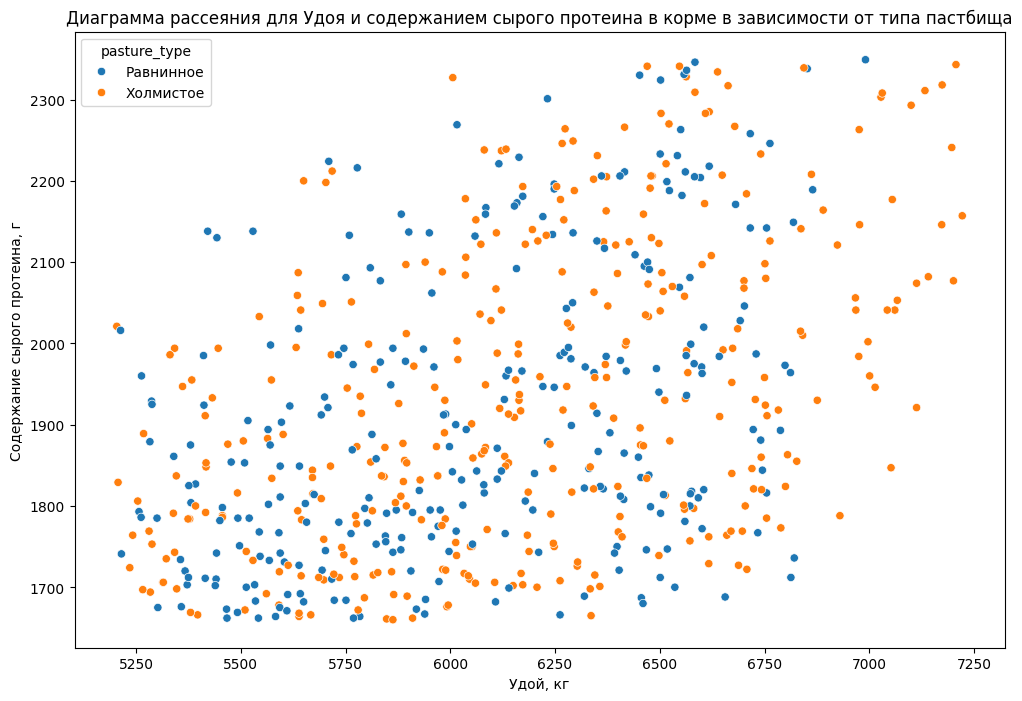

In [81]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="raw_protein_g", hue="pasture_type")
plt.title('Диаграмма рассеяния для Удоя и содержанием сырого протеина в корме в зависимости от типа пастбища')
plt.xlabel('Удой, кг')
plt.ylabel('Содержание сырого протеина, г')
plt.show()

Линейная зависимость слабая

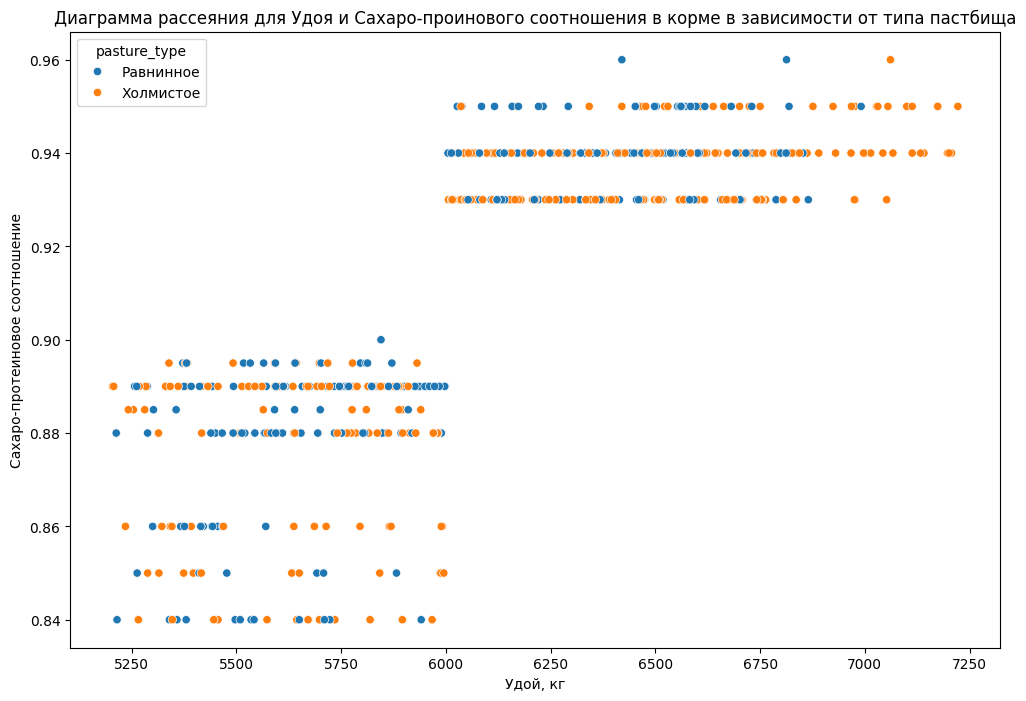

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="sugar_protein_ratio", hue="pasture_type")
plt.title('Диаграмма рассеяния для Удоя и Сахаро-проинового соотношения в корме в зависимости от типа пастбища')
plt.xlabel('Удой, кг')
plt.ylabel('Сахаро-протеиновое соотношение')
plt.show()

Удой и Сахаро-протеиновое соотношение связаны нелинейно, данные сгруппированы в два кластера граница находится на 6000 кг. Показатели одинаковы для обоих типов пастбищ.

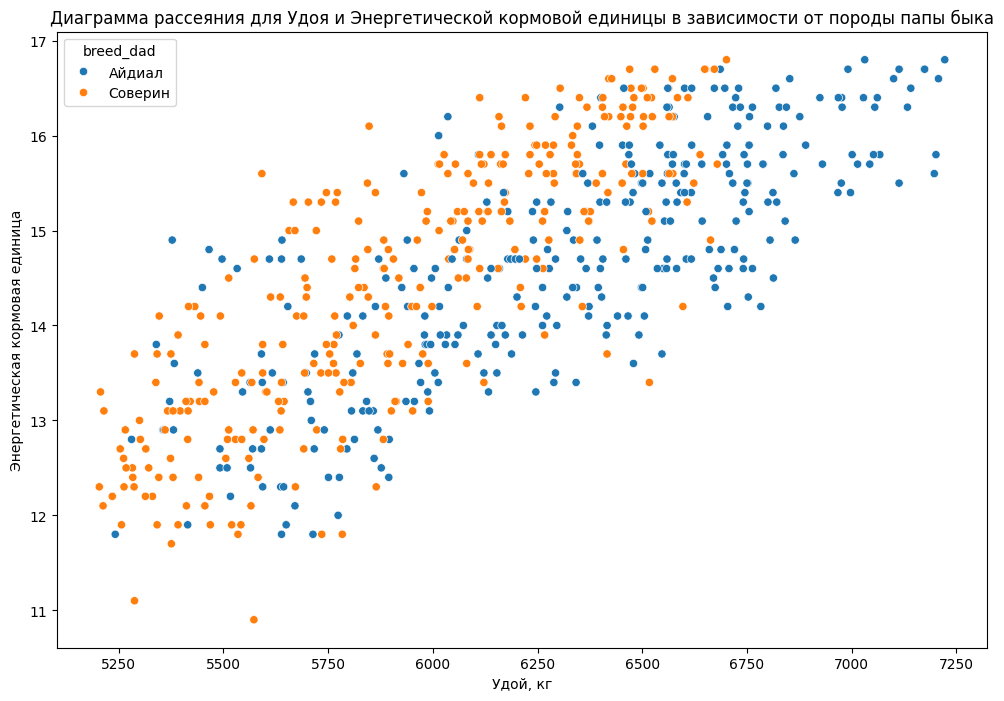

In [83]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="efu", hue="breed_dad")
plt.title('Диаграмма рассеяния для Удоя и Энергетической кормовой единицы в зависимости от породы папы быка')
plt.xlabel('Удой, кг')
plt.ylabel('Энергетическая кормовая единица')
plt.show()

Наблюдается линейная зависимость, при этом, показатель питательности корма выше у породы Соверин, а Удой у породы Айдиал

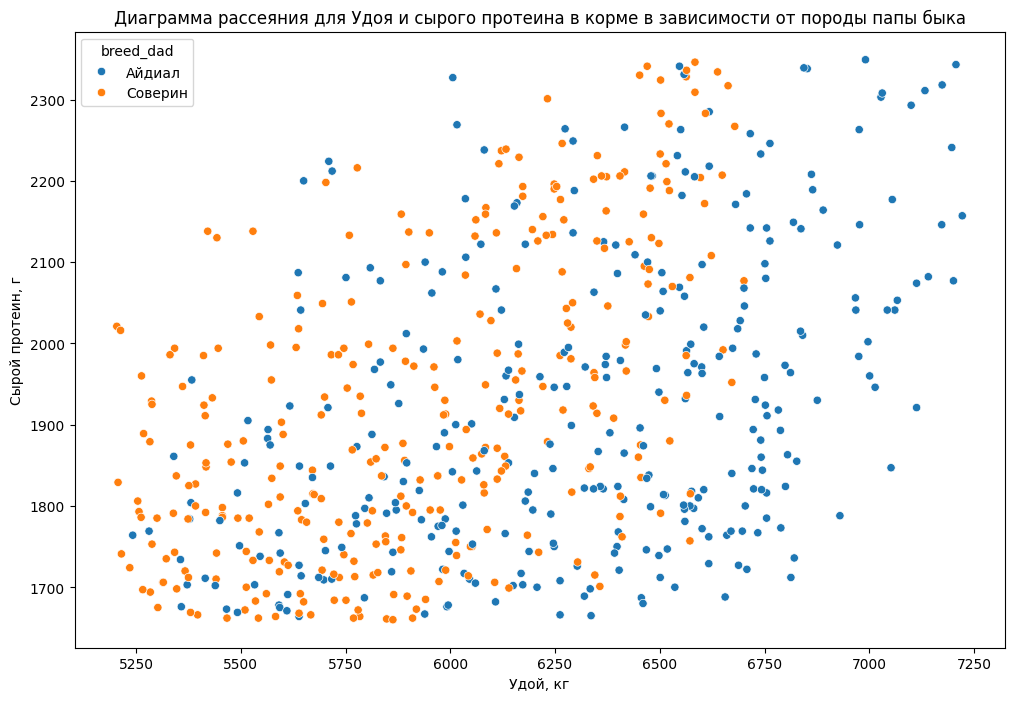

In [84]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="raw_protein_g", hue="breed_dad")
plt.title('Диаграмма рассеяния для Удоя и сырого протеина в корме в зависимости от породы папы быка')
plt.xlabel('Удой, кг')
plt.ylabel('Сырой протеин, г')
plt.show()

Наблюдается слабая линейная зависимость

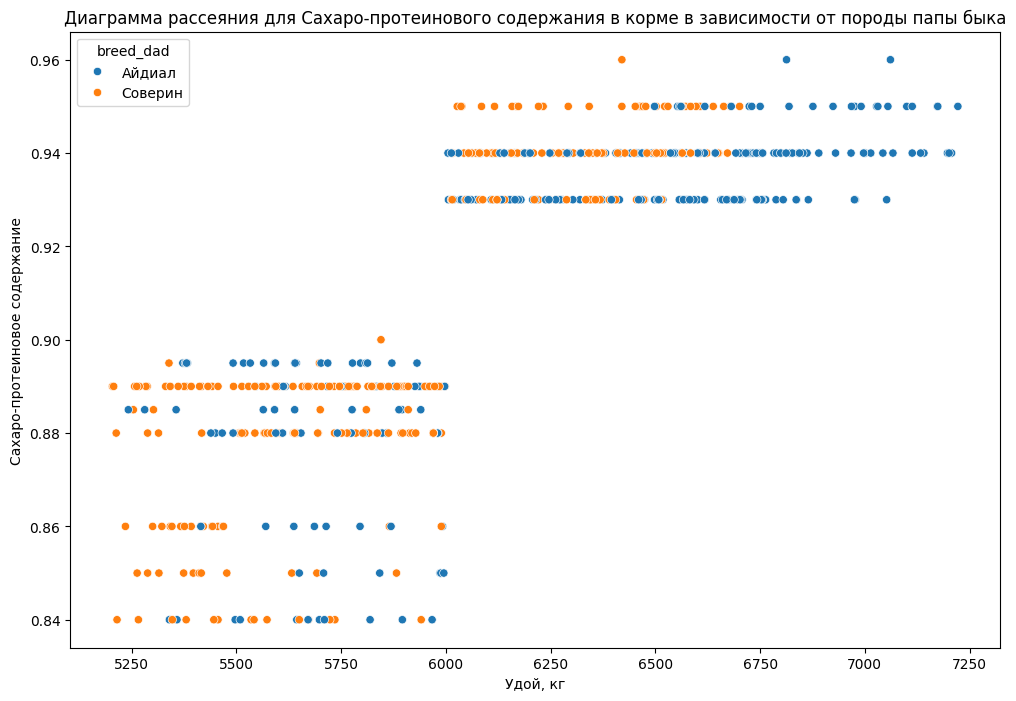

In [85]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="milk_yield_kg", y="sugar_protein_ratio", hue="breed_dad")
plt.title('Диаграмма рассеяния для Сахаро-протеинового содержания в корме в зависимости от породы папы быка')
plt.xlabel('Удой, кг')
plt.ylabel('Сахаро-протеиновое содержание')
plt.show()

Удой и Сахаро-протеиновое соотношение связаны нелинейно, данные сгруппированы в два кластера граница находится на 6000 кг. Показатели одинаковы для обоих пород папы быка.

Посмотрим на зависимость Удоя от неколичественных характеристик.

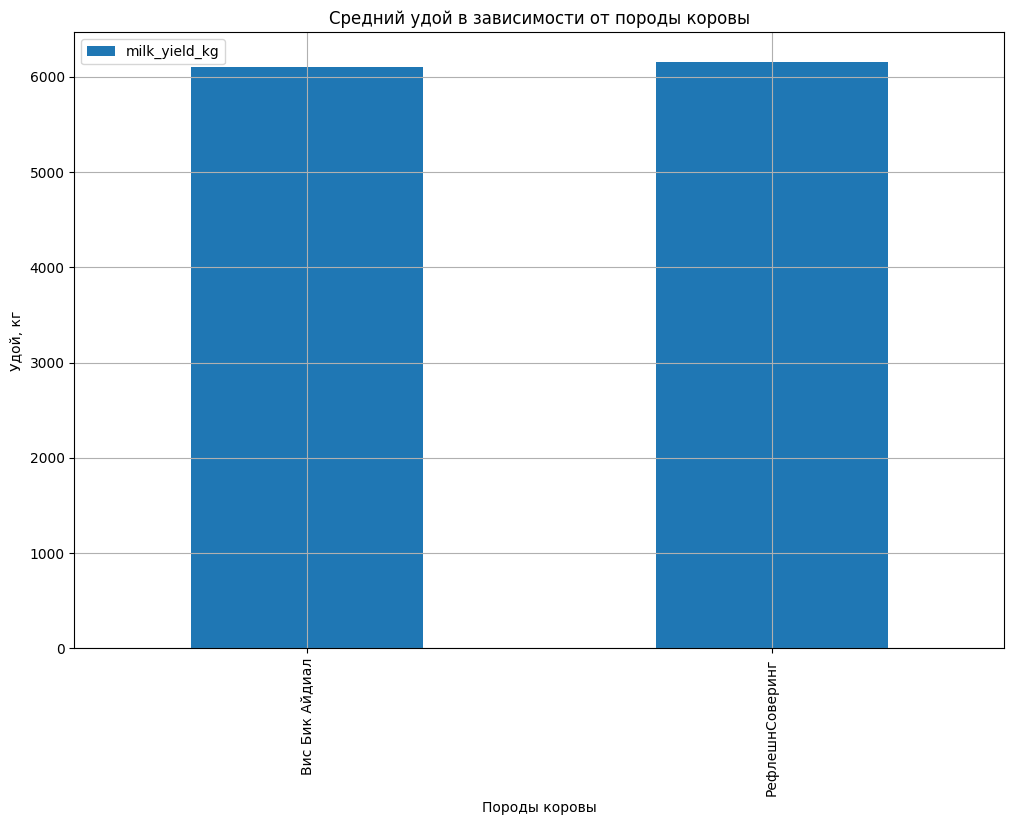

In [86]:
data_main.pivot_table(index='breed', values='milk_yield_kg', aggfunc='mean').plot(kind='bar', figsize=(12,8), grid=True)
plt.title('Средний удой в зависимости от породы коровы')
plt.xlabel('Породы коровы')
plt.ylabel('Удой, кг')
plt.show()

Средний удой у обеих пород примерно одинаковый.

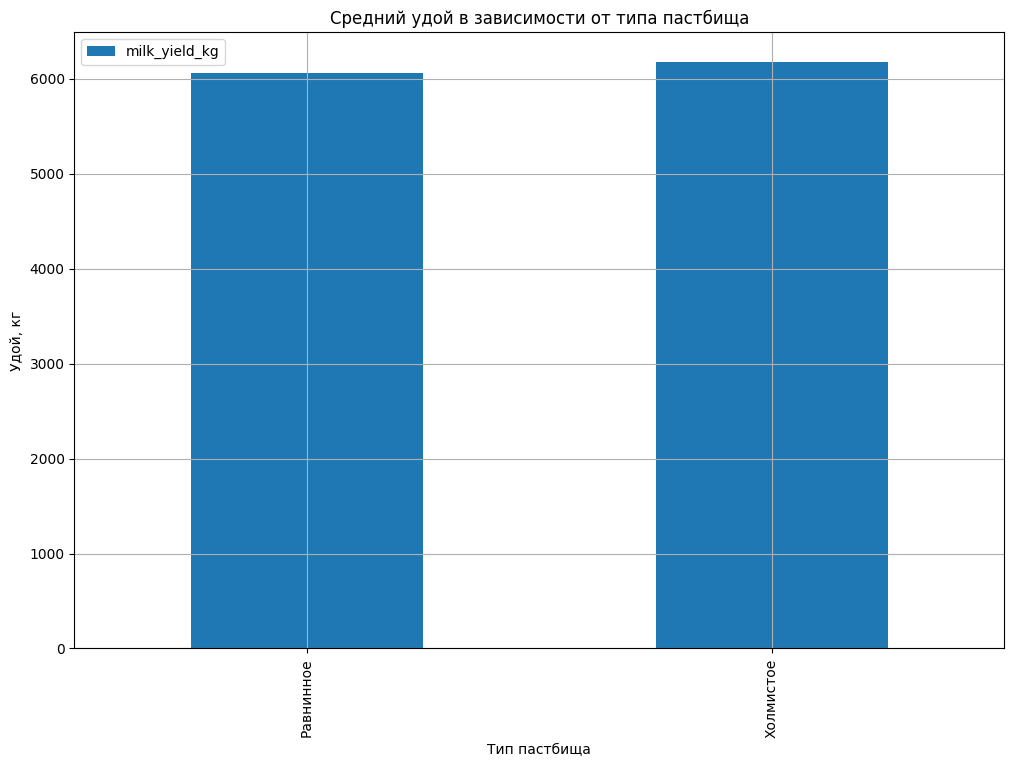

In [87]:
data_main.pivot_table(index='pasture_type', values='milk_yield_kg', aggfunc='mean').plot(kind='bar', figsize=(12,8), grid=True)
plt.title('Средний удой в зависимости от типа пастбища')
plt.xlabel('Тип пастбища')
plt.ylabel('Удой, кг')
plt.show()

У коров, пасущихся в холмистой местности средний удой чуть выше.

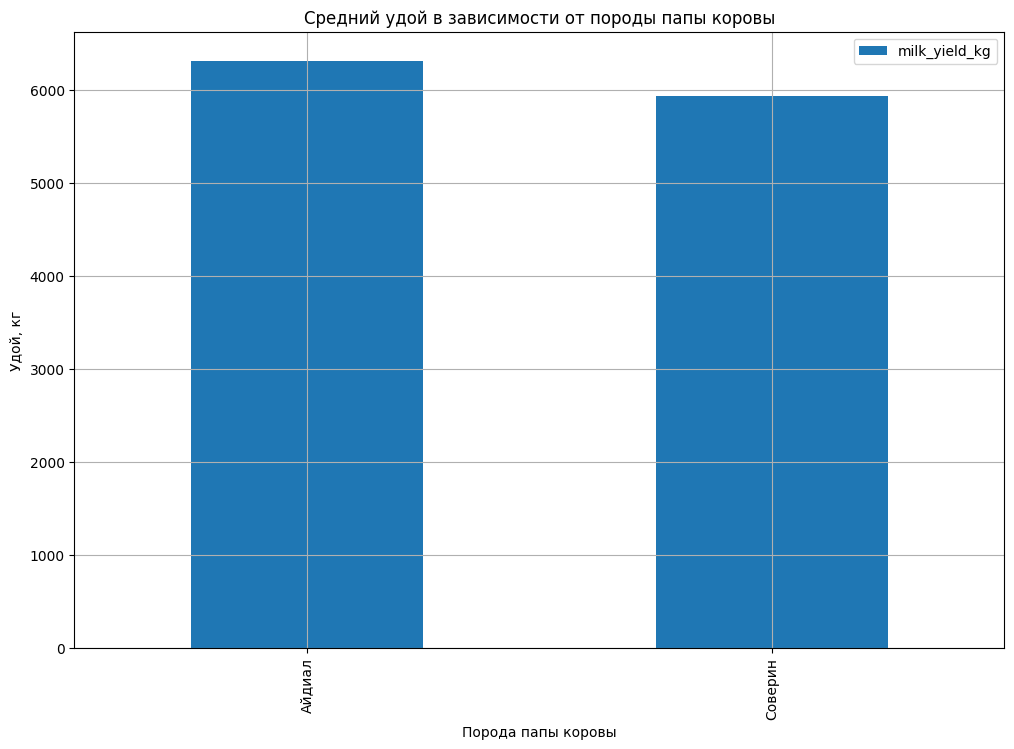

In [88]:
data_main.pivot_table(index='breed_dad', values='milk_yield_kg', aggfunc='mean').plot(kind='bar', figsize=(12,8), grid=True)
plt.title('Средний удой в зависимости от породы папы коровы')
plt.xlabel('Порода папы коровы')
plt.ylabel('Удой, кг')
plt.show()

Средний удой от коров, порода папы быка который Айдиал чуть выше.

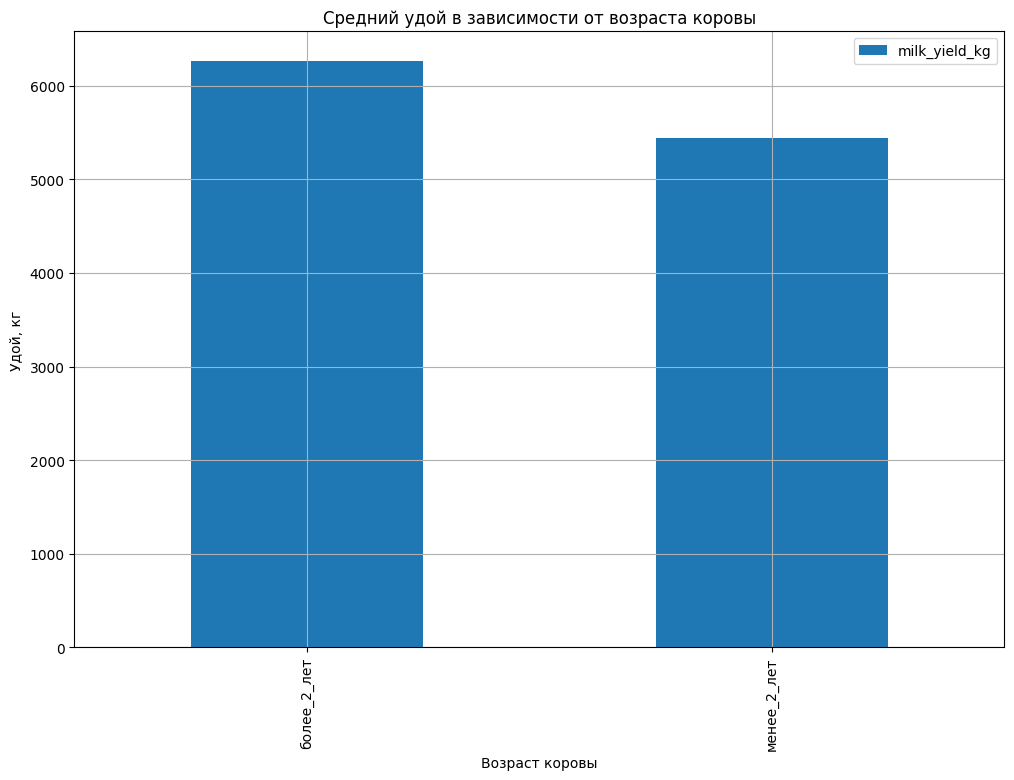

In [89]:
data_main.pivot_table(index='age', values='milk_yield_kg', aggfunc='mean').plot(kind='bar', figsize=(12,8), grid=True)
plt.title('Средний удой в зависимости от возраста коровы')
plt.xlabel('Возраст коровы')
plt.ylabel('Удой, кг')
plt.show()

У коров старше двух лет средняя величина удоя выше.

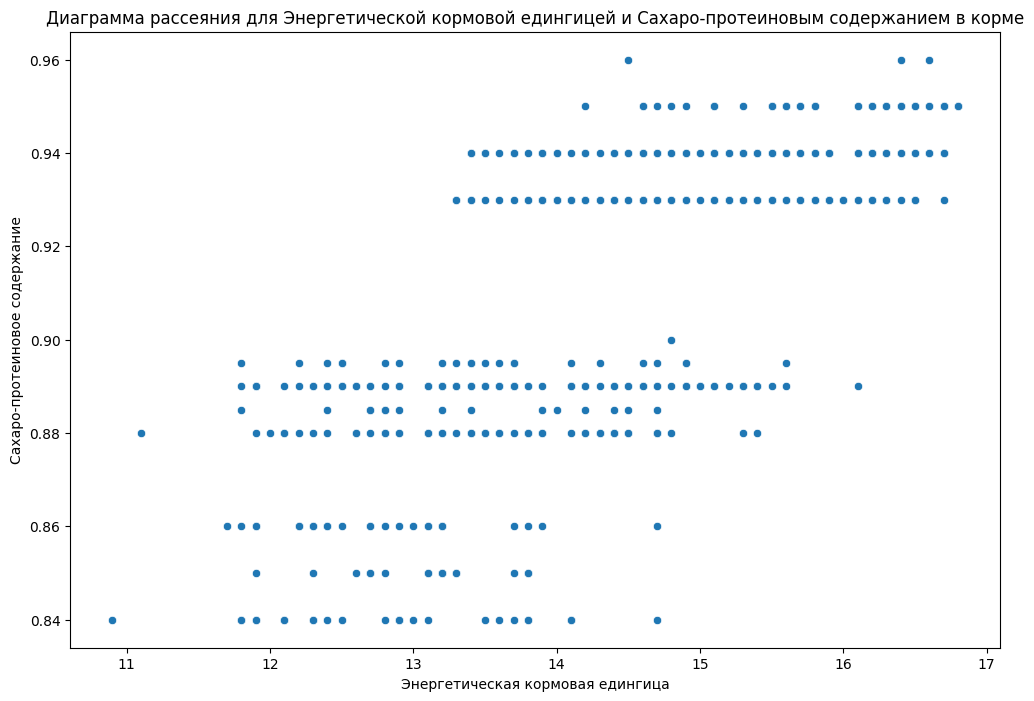

In [90]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_main, x="efu", y="sugar_protein_ratio")
plt.title('Диаграмма рассеяния для Энергетической кормовой едингицей и Сахаро-протеиновым содержанием в корме')
plt.xlabel('Энергетическая кормовая едингица')
plt.ylabel('Сахаро-протеиновое содержание')
plt.show()

### Вывод.

* Сильная корреляция наблюдается между Удоем и содержанием жиров в корме (0,71), а также Удоем и Энергетической кормовой единицей(0,72).  Связь линейная, остальные признаки тоже коррелируют с целевым, но связь слабее. Модель линейной регресси можно применить для имеющихся данных, так как наблюдается сильная линейная зависимость между целевом признаком и входными признаками; 
* Между прогнозными признаками также наблюдается корреляция (Энергетическая кормовая единица и содержание жиров в корме), но говорить о мультиколлениарности нельзя, так как коэффициент корреляции равен 0,72, что меньше 0,9.
* По графикам видно, что на Удой влияют характеристики корма, характеристики коровы и тип пастбища. Удой и характиристики молока не связаны.
* Нелинейная связь наблюдается между величиной Удоя и содержанием протеина в корме, при этом коэффициент корреляции - 0,45.

## Обучение модели линейной регрессии

### Первая модель

Используем в качестве целевого признака Удой, кг. На удой не влияют характеристики молока, а именно, содержание жиров и протеина, а также вкус молока, эти столбцы можно удалить.

In [91]:
y = data_main['milk_yield_kg']
X = data_main.drop(['milk_yield_kg', 'fat_content', 'protein', 'milk_taste', 'id'], axis=1)

Разобьем данные на тренировочную и тестовую выборки.

In [92]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

Кодируем категориальные признаки с помощью OneHotEncoder.

In [93]:
cat_col = ['breed', 'pasture_type', 'breed_dad', 'age']
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_one = encoder.fit_transform(X_train[cat_col])
X_test_one = encoder.transform(X_test[cat_col])
encoder_col = encoder.get_feature_names_out()

Масштабируем количественные признаки с помощью StandardScaler.

In [94]:
num_col = ['efu', 'raw_protein_g', 'sugar_protein_ratio']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col])
X_test_scaled = scaler.transform(X_test[num_col])

Создадим тренировочный и тестовые датасеты из закодированных и отмасштабированных данных.

In [95]:
X_train_one = pd.DataFrame(X_train_one, columns = encoder_col)
X_test_one = pd.DataFrame(X_test_one, columns = encoder_col)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col)

Объединим все преобразованные данные в тренировочный и тестовый датасеты.

In [96]:
X_train = pd.concat([X_train_one, X_train_scaled], axis=1)
X_test = pd.concat([X_test_one, X_test_scaled], axis=1)

Обучим модель линейной регресси на подготовленных данных.

In [97]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

Оценим качество модели на тестовой выборке: рассчитаем R2.

In [98]:
r2 = r2_score(y_test, predictions)
r2

0.7526889845143692

В 75% случаев предсказания модели ближе к истине, чем среднее значение целевого признака.

In [99]:
mse = mean_squared_error(y_test, predictions)
mse

46380.33204021292

In [100]:
mae = mean_absolute_error(y_test, predictions)
mae

169.0687193222776

In [101]:
rmse = root_mean_squared_error(y_test, predictions)
rmse

215.36093434096378

Проанализируем остатки с помощью графиков.

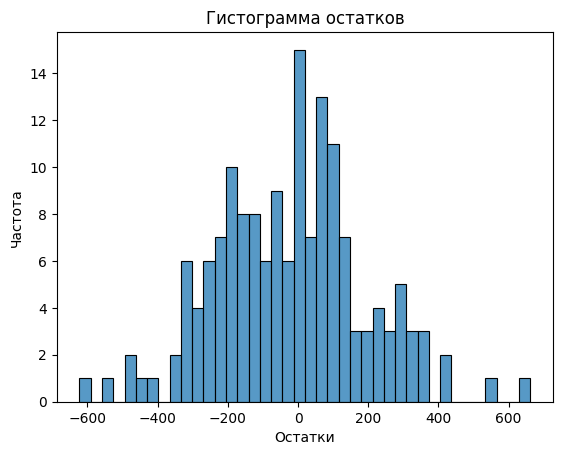

In [102]:
sns.histplot(data = y_test-predictions, bins = 40)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')  
plt.show()

Остатки распределены относительно равномерно, но есть выбросы, модель явно что-то не учитывает и ее нужно улучшить, возможно добавить дополнительные признаки.

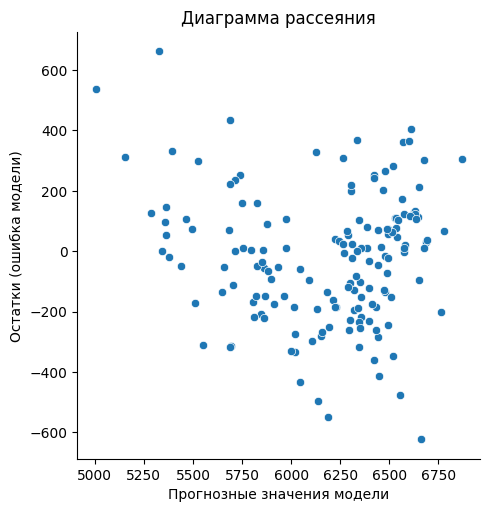

In [103]:
sns.relplot(x = predictions, y =y_test-predictions)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('Остатки (ошибка модели)')
plt.title('Диаграмма рассеяния')
plt.show()

Дисперсия остатков постоянна.

**Вывод:**
* R2 = 0.75. В 75% случаев предсказания модели ближе к истине, чем среднее значение целевого признака, это низкий показатель, чем R2 ближе к 1, тем лучше модель делает предсказания.
* Остатки распределены относительно равномерно, но есть выбросы. Дисперсия остатков постоянна.

Модель явно что-то не учитывает и ее нужно улучшить, возможно добавить дополнительные признаки, исключить нелинейность прогнозных значений.

### Вторая модель

Преобразуем СПО в бинарный признак и устраним нелинейность.

In [104]:
data_main.loc[data_main['sugar_protein_ratio']<0.91, 'sugar_protein_ratio'] = 0
data_main.loc[data_main['sugar_protein_ratio']>0.91, 'sugar_protein_ratio'] = 1

Введем новый признак - энергетическая кормовая единица в квадрате.

In [105]:
data_main['efu_2'] = data_main['efu'] ** 2
data_main.head()

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,breed,pasture_type,breed_dad,fat_content,protein,milk_taste,age,efu_2
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84


Обучим вторую модель с учетом проделанных шагов.

In [106]:
y = data_main['milk_yield_kg']
X = data_main.drop(['milk_yield_kg', 'fat_content', 'protein', 'milk_taste', 'id', 'efu'], axis=1)

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

cat_col = ['breed', 'pasture_type', 'breed_dad', 'age', 'sugar_protein_ratio']
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_one = encoder.fit_transform(X_train[cat_col])
X_test_one = encoder.transform(X_test[cat_col])
encoder_col = encoder.get_feature_names_out()

num_col = ['raw_protein_g', 'efu_2']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col])
X_test_scaled = scaler.transform(X_test[num_col])

X_train_one = pd.DataFrame(X_train_one, columns = encoder_col)
X_test_one = pd.DataFrame(X_test_one, columns = encoder_col)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col)

X_train = pd.concat([X_train_one, X_train_scaled], axis=1)
X_test = pd.concat([X_test_one, X_test_scaled], axis=1)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

r2 = r2_score(y_test, predictions)
r2

0.7903877940199927

In [107]:
mse = mean_squared_error(y_test, predictions)
mse

39310.35459113667

In [108]:
mae = mean_absolute_error(y_test, predictions)
mae

153.9072772939154

In [109]:
rmse = root_mean_squared_error(y_test, predictions)
rmse

198.26839029743664

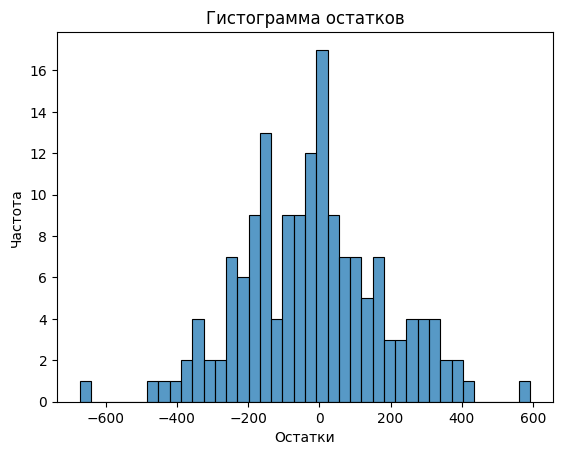

In [110]:
sns.histplot(data = y_test-predictions, bins = 40)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')  
plt.show()

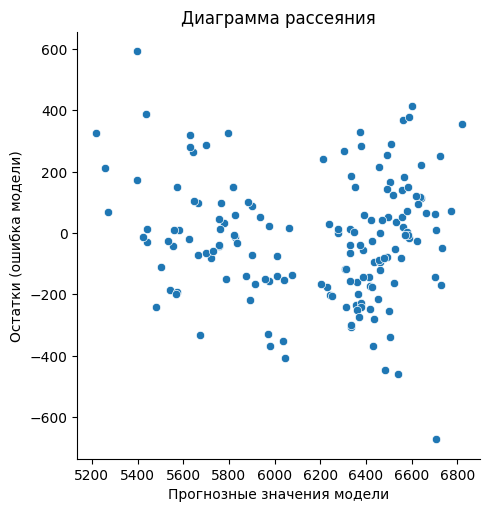

In [111]:
sns.relplot(x = predictions, y =y_test-predictions)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('Остатки (ошибка модели)')
plt.title('Диаграмма рассеяния')
plt.show()

**Вывод:**
* R2 = 0.79. В 79% случаев предсказания модели ближе к истине, чем среднее значение целевого признака. Модель стала чуть лучше делать предсказания.
* Остатки распределены относительно равномерно, но есть выбросы. В середине графика разброс остатков меньше.

Прогнозы модели по-прежнему ненадежны, ее необходимо улучшить, добавив новые признаки.

### Третья модель

Добавим признак Имя папы из датасета data_dad.

In [112]:
result_data = pd.merge(data_main, data_dad, on = 'id')
result_data.head()

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,breed,pasture_type,breed_dad,fat_content,protein,milk_taste,age,efu_2,dad_name
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,Барин


Обучим третью модель с учетом проделанных шагов.

In [113]:
y = result_data['milk_yield_kg']
X = result_data.drop(['milk_yield_kg', 'fat_content', 'protein', 'milk_taste', 'efu', 'id'], axis=1)

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

cat_col = ['sugar_protein_ratio', 'breed', 'pasture_type', 'breed_dad', 'age', 'dad_name']
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_one = encoder.fit_transform(X_train[cat_col])
X_test_one = encoder.transform(X_test[cat_col])
encoder_col = encoder.get_feature_names_out()

num_col = ['raw_protein_g', 'efu_2']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col])
X_test_scaled = scaler.transform(X_test[num_col])

X_train_one = pd.DataFrame(X_train_one, columns = encoder_col)
X_test_one = pd.DataFrame(X_test_one, columns = encoder_col)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col)

X_train = pd.concat([X_train_one, X_train_scaled], axis=1)
X_test = pd.concat([X_test_one, X_test_scaled], axis=1)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

r2 = r2_score(y_test, predictions)
r2


0.802357742803108

In [114]:
X.head()

,raw_protein_g,sugar_protein_ratio,breed,pasture_type,breed_dad,age,efu_2,dad_name
0,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,201.64,Буйный
1,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,163.84,Соловчик
2,1854,0.0,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,196.00,Барин
3,2012,0.0,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,153.76,Буйный
4,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,163.84,Барин


In [115]:
mse = mean_squared_error(y_test, predictions)
mse

37065.52858540833

In [116]:
mae = mean_absolute_error(y_test, predictions)
mae

148.84232234555319

In [117]:
rmse = root_mean_squared_error(y_test, predictions)
rmse

192.52409871340348

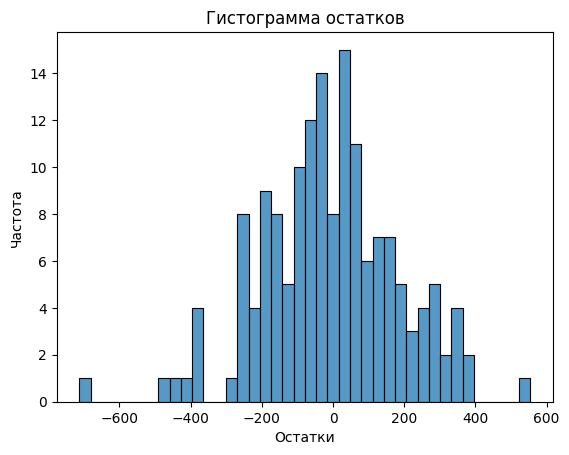

In [118]:
sns.histplot(data = y_test-predictions, bins = 40)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')  
plt.show()

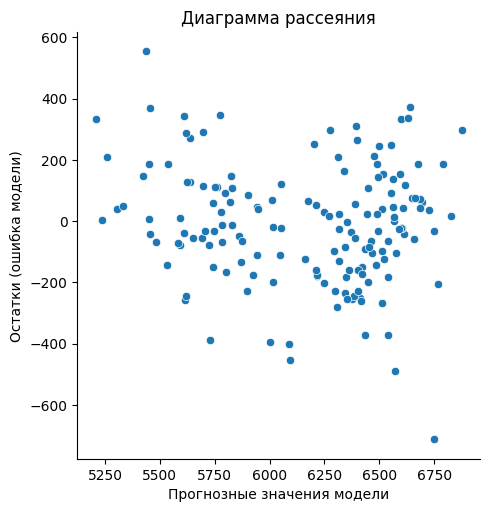

In [119]:
sns.relplot(x = predictions, y =y_test-predictions)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('Остатки (ошибка модели)')
plt.title('Диаграмма рассеяния')
plt.show()

**Вывод:**
* R2 = 0.8. В 80% случаев предсказания модели ближе к истине, чем среднее значение целевого признака. Модель стала чуть лучше делать предсказания.
* Остатки распределены относительно равномерно, но есть выбросы. В середине графика разброс остатков меньше.

Прогнозы модели по-прежнему ненадежны, ее необходимо улучшить, добавив новые признаки.

### Сопоставим качество трех моделей

R2(1) = 0.75
R2(2) = 0.79
R2(3) = 0.8
Избавивишись от нелинейности и добавив дополнительный признак "Имя папы", мы немного улучшили качество модели, распределение остатков тоже улучшилось, но модель все равно работает неидеально.

### Оценим качество каждой модели по трем метрикам: MSE, MAE, RMSE

mse(1) = 46380
mae(1) = 169
rmse(1) = 215

mse(2) = 39310
mae(2) = 153
rmse(2) = 198

mse(3) = 37065
mae(3) = 148
rmse(3) = 192

Выбросов в данных нет, поэтому для оценки качетсва модели лучше использовать метрику rmse, так как результаты метрики mae будут слишком оптимистичными. Результаты говорят нам о том, что первая модель в среднем ошибается на 215 кг, вторая на 198 кг, третья на 192 кг.
Можно с уверенностью сказать, что третья модель лучше справляется с прогнозом, rmse у нее меньше, а r2 ближе к единице.

In [120]:
train_predictions = model_lr.predict(X_train)
lower_quantile = (y_train - train_predictions).quantile(q=0.025)
upper_quantile = (y_train - train_predictions).quantile(q=0.975)
pred_lower = predictions + lower_quantile
pred_upper = predictions + upper_quantile
print(f'Доверительный интервал: [{pred_lower[0]}, {pred_upper[0]}]')

Доверительный интервал: [5366.47837751984, 6067.219927179223]


### С помощью третьей модели спрогнозируем удой коров, которых фермер может купить

In [121]:
data_cow_buy['efu'] = data_main['efu'].mean() * 1.05
data_cow_buy['raw_protein_g'] = data_main['raw_protein_g'].mean() * 1.05
data_cow_buy['sugar_protein_ratio'] = data_main['sugar_protein_ratio'].mean() * 1.05
data_cow_buy['efu_2'] = data_cow_buy['efu']**2
data_cow_buy.loc[data_cow_buy['sugar_protein_ratio'] >= 0.92, 'sugar_protein_ratio'] = 1
data_cow_buy.loc[data_cow_buy['sugar_protein_ratio'] < 0.92, 'sugar_protein_ratio'] = 0
data_cow_buy.head()

,breed,pasture_type,breed_dad,dad_name,current_fat_content,current_protein_level,age,efu,raw_protein_g,sugar_protein_ratio,efu_2
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.274929,2019.227962,0.0,233.323453
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.274929,2019.227962,0.0,233.323453
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.274929,2019.227962,0.0,233.323453
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.274929,2019.227962,0.0,233.323453
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.274929,2019.227962,0.0,233.323453


In [122]:
data_cow_buy.pasture_type = data_cow_buy.pasture_type.str.title()

In [123]:
X = data_cow_buy.drop(['current_fat_content', 'current_protein_level', 'efu'], axis = 1)

In [124]:
X = X[['raw_protein_g', 'sugar_protein_ratio', 'breed', 'pasture_type', 'breed_dad', 'age', 'efu_2', 'dad_name']]

In [125]:
X_ohe = encoder.transform(X[cat_col])
encoder_col_names = encoder.get_feature_names_out()
X_scaled = scaler.transform(X[num_col])
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col)
X = pd.concat([X_ohe, X_scaled], axis=1)
predictions = model_lr.predict(X)
data_cow_buy['milk_yield_kg'] = predictions
data_cow_buy.head()

,breed,pasture_type,breed_dad,dad_name,current_fat_content,current_protein_level,age,efu,raw_protein_g,sugar_protein_ratio,efu_2,milk_yield_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.274929,2019.227962,0.0,233.323453,6240.040840
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.274929,2019.227962,0.0,233.323453,5988.666619
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.274929,2019.227962,0.0,233.323453,5928.260270
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.274929,2019.227962,0.0,233.323453,6243.043387
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.274929,2019.227962,0.0,233.323453,6190.459598


### Вывод

На данном этапе я обучила три модели линейной регресси, выбрав из них лучшую, получила прогноз удоя коров.

## Обучение модели логистической регрессии

### Обучим модель логистической регрессии

In [126]:
result_data.head()

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,breed,pasture_type,breed_dad,fat_content,protein,milk_taste,age,efu_2,dad_name
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,Барин


In [127]:
result_data.loc[result_data['milk_taste'] == 'вкусно', 'milk_taste'] = 1
result_data.loc[result_data['milk_taste'] == 'не вкусно', 'milk_taste'] = 0
result_data['milk_taste'] = result_data['milk_taste'].astype('bool')

In [128]:
y = result_data['milk_taste']
X = result_data.drop(['milk_taste', 'id', 'efu', 'milk_yield_kg'], axis=1)

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

cat_col = ['breed', 'pasture_type', 'breed_dad', 'age', 'dad_name']
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_one = encoder.fit_transform(X_train[cat_col])
X_test_one = encoder.transform(X_test[cat_col])
encoder_col = encoder.get_feature_names_out()

num_col = ['raw_protein_g', 'efu_2', 'fat_content', 'protein', 'sugar_protein_ratio']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col])
X_test_scaled = scaler.transform(X_test[num_col])

X_train_one = pd.DataFrame(X_train_one, columns = encoder_col)
X_test_one = pd.DataFrame(X_test_one, columns = encoder_col)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col)

X_train = pd.concat([X_train_one, X_train_scaled], axis=1)
X_test = pd.concat([X_test_one, X_test_scaled], axis=1)

clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc = accuracy_score(y_test, predictions)
acc

0.6415094339622641

In [129]:
precision = precision_score(y_test, predictions)
precision

0.6504065040650406

In [130]:
recall = recall_score(y_test, predictions)
recall

0.851063829787234

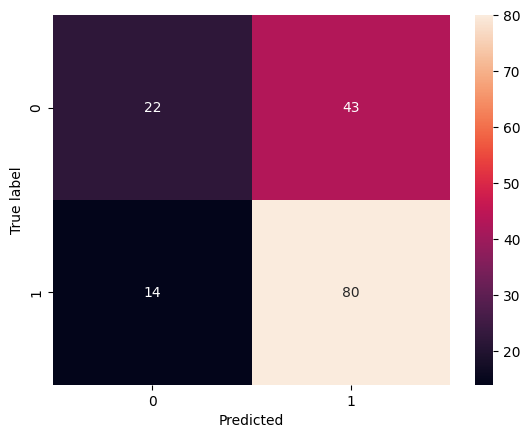

In [131]:
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Построила модель, рассчитала метрики: 
* accuracy = 0.64 (в 64 % модель верно предсказывает значение. Модель явно нужно улучшать)
* precision = 0.65
* recall = 0.85
Модель более чувствительна к ошибкам второго рода

Построила матрицу ошибок/

### Проанализируем модель логистической регрессии

Ошибка первого рода критичнее для фермера, так как главная цель фермера - получить вкусное молоко, поэтому нельзя присваивать невкусному молоку статус "вкусное". Необходимо свести эту ошибку к нуля, для этого изменим порог классификации.

In [132]:
porog = 0.5
while True:
    porog += 0.01
    y_pred = (clf.predict_proba(X_test)[:,1] >= porog).astype(bool)
    if (precision_score(y_test, y_pred) == 1): 
        break
porog

0.8200000000000003

In [133]:
acc = accuracy_score(y_test, y_pred)
acc

0.4528301886792453

In [134]:
precision = precision_score(y_test, y_pred)
precision

1.0

In [135]:
recall = recall_score(y_test, y_pred)
recall

0.07446808510638298

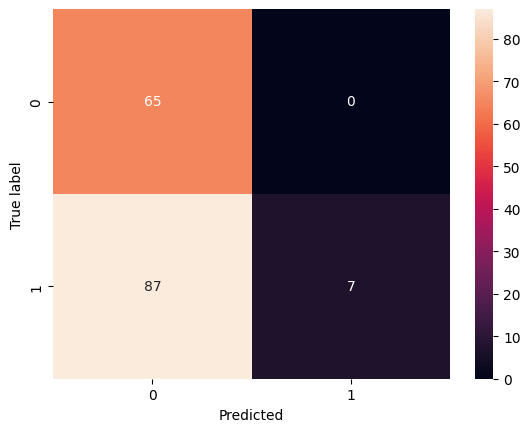

In [136]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

**Вывод:**
Значение порога должно быть 0,82, чтобы исключить все ошибки первого рода, ошибки второго рода соответственно значительно увеличились и общая способность модели делать предсказания существенно ухудшилась. Но теперь мы с уверенностью может сказать. что фермер получит только вкусное молоко.

### С помощью полученной модели спрогнозируем вкус молока коров, которых фермер хочет купить.

In [137]:
data_cow_buy.head()

,breed,pasture_type,breed_dad,dad_name,current_fat_content,current_protein_level,age,efu,raw_protein_g,sugar_protein_ratio,efu_2,milk_yield_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.274929,2019.227962,0.0,233.323453,6240.040840
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.274929,2019.227962,0.0,233.323453,5988.666619
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.274929,2019.227962,0.0,233.323453,5928.260270
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.274929,2019.227962,0.0,233.323453,6243.043387
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.274929,2019.227962,0.0,233.323453,6190.459598


In [138]:
result_data.head()

,id,milk_yield_kg,efu,raw_protein_g,sugar_protein_ratio,breed,pasture_type,breed_dad,fat_content,protein,milk_taste,age,efu_2,dad_name
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,True,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,True,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,False,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,False,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,True,менее_2_лет,163.84,Барин


In [139]:
data_cow_buy.rename(columns = {'current_fat_content':'fat_content', 'current_protein_level':'protein'}, inplace = True)

In [140]:
X = data_cow_buy.drop(['efu', 'milk_yield_kg'], axis = 1)

In [141]:
X = X[['raw_protein_g', 'sugar_protein_ratio', 'breed', 'pasture_type', 'breed_dad', 'fat_content', 'protein', 'age', 'efu_2', 'dad_name']]

In [142]:
X_ohe = encoder.transform(X[cat_col])
encoder_col_names = encoder.get_feature_names_out()
X_scaled = scaler.transform(X[num_col])
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col)
X = pd.concat([X_ohe, X_scaled], axis=1)
predictions = clf.predict_proba(X)[:,1] >= 0.82
data_cow_buy['milk_taste'] = predictions
data_cow_buy.loc[data_cow_buy['milk_taste'] == True, 'milk_taste'] = 'вкусное'
data_cow_buy.loc[data_cow_buy['milk_taste'] == False, 'milk_taste'] = 'не вкусное'
data_cow_buy.head()

C:\Users\peredkova\AppData\Local\Temp\ipykernel_14048\1055821750.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'вкусное' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_cow_buy.loc[data_cow_buy['milk_taste'] == True, 'milk_taste'] = 'вкусное'


,breed,pasture_type,breed_dad,dad_name,fat_content,protein,age,efu,raw_protein_g,sugar_protein_ratio,efu_2,milk_yield_kg,milk_taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.274929,2019.227962,0.0,233.323453,6240.040840,вкусное
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.274929,2019.227962,0.0,233.323453,5988.666619,вкусное
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.274929,2019.227962,0.0,233.323453,5928.260270,не вкусное
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.274929,2019.227962,0.0,233.323453,6243.043387,не вкусное
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.274929,2019.227962,0.0,233.323453,6190.459598,не вкусное


### Вывод

На данном этапе я обучила модель логистической регрессии и получила прогноз вкуса молока. 

## Итоговые выводы

In [143]:
data_cow_buy.head()

,breed,pasture_type,breed_dad,dad_name,fat_content,protein,age,efu,raw_protein_g,sugar_protein_ratio,efu_2,milk_yield_kg,milk_taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.274929,2019.227962,0.0,233.323453,6240.040840,вкусное
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.274929,2019.227962,0.0,233.323453,5988.666619,вкусное
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.274929,2019.227962,0.0,233.323453,5928.260270,не вкусное
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.274929,2019.227962,0.0,233.323453,6243.043387,не вкусное
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.274929,2019.227962,0.0,233.323453,6190.459598,не вкусное


Прогноз вкуса молока и удоя коров добавлены в датафрейм.

In [144]:
data_cow_buy[(data_cow_buy['milk_yield_kg'] >= 6000) & (data_cow_buy['milk_taste'] == 'вкусное')]

,breed,pasture_type,breed_dad,dad_name,fat_content,protein,age,efu,raw_protein_g,sugar_protein_ratio,efu_2,milk_yield_kg,milk_taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.274929,2019.227962,0.0,233.323453,6240.040840,вкусное
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.274929,2019.227962,0.0,233.323453,6240.040840,вкусное
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.274929,2019.227962,0.0,233.323453,6023.216767,вкусное


Фермер может купить 3 коровы, удовлетворяющих его требованиям.

Для улучшение данных модели я использовала, масштабирование и кодирование данных. Возможно стоит попробовать другой способ масштабирование данных: нормализацию, а не стандартизацию.

Еще одним способом улучшение модели является добавление новых признаков в датасет.

Метрики recall и precision важны при анализе рисков и экономических просчетов. В данном случае для фермера важным был именно вкус молока, поэтому необходимо было избавиться от таких ситуаций, когда невкусному молоку присваивался статус вкусного, то есть избавиться от ошибок превого рода.

Можно попробовать использовать другие модели МО.

## Общий вывод

В данном проекте я выполнила следующие шаги:
* **Выполнила предобработку данных:** 
    * Заменила названия столбцов
    * Привела столбцы к правильному типу данных
    * Обработала дубликаты, аномальных значений и пропусков в данных не обнаружено.
    
* **Провела исследовательский анализ данных и на его основе удалила одно аномальное значение в данных по удою:**

* **Провела корреляционный анализ данных и на его основе сделала следующие выводы:**
* Согласно матрице корреляции, сильная линейная зависимость наблюдается между Сахаро-протеиновым содержанием и Удоем - 0,81, связь нелинейная, а также Энергетической кормовой единицей и Удоем - 0,77, связь линейная, остальные признаки тоже коррелируют с целевым, но связь слабее. Модель линейной регресси можно применить для имеющихся данных, так как наблюдается сильная линейная зависимость между целевом признаком и входными признаками; 
* Также мы видим сильную корреляцию между Сахаро-протеиновым соотношением и Энергетической кормовой единицей - 0,75. Но говороить о мультиколлинеарности нельзя, так как коэффициент меньше 0,9.
* По графикам видно, что на Удой влияют характеристики корма, характеристики коровы и тип пастбища. Удой и характиристики молока не связаны.
* Нелинейная связь наблюдается между величиной Удоя и содержанием протеина в корме, при этом коэффициент корреляции - 0,45.

* **Я обучила три модели линейной регрессии, выбрав из них лучшую, получила прогноз удоя коров.**
* Для улучшения модели избдавилась от нелинейности и обогатила данные.
* Рассчитала метрики лучшей модели:
mae(3) = 148
rmse(3) = 192
mse(3) = 37065
r2(3) = 0.8

Результаты говорят нам о том, что модель в среднем ошибается на 192 кг. Проанализировав остатки, я поняла, что модель следуюет улучшить, возможно, добавить новые данные.

* **Я обучила модель логистической регрессии и получила прогноз вкуса молока.**

В процессе я избавилась от ошибок первого рода, изменив занчение порога принадлежности к классам, чтобы с уверенностью можно было сказать, что фермер получит только вкусное молоко.

Получила 3 коровы, которых фермер можнт приобрести с минимальными рисками для себя.

Судя по метрикам и анализу остатков, обе модели необходимо улучшать. Нам может помочь добавление новых признаков в датасет.